In [1]:
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

# some PCA and GMM stuff
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

import sklearn.ensemble as ske
from sklearn.feature_selection import SelectFromModel

import seaborn as sns
sns.set()

# Very basic wrangling (no real cleaning)

In [2]:
def load_data(filename):
    dtypes = {
        'ProductName':                                          'int64',
        'EngineVersion':                                        'int64',
        'AppVersion':                                           'int64',
        'AvSigVersion':                                         'int64',
        'RtpStateBitfield':                                     'int64',
        'Platform':                                             'int64',
        'Processor':                                            'int64',
        'OsVer':                                                'int64',
        'OsPlatformSubRelease':                                 'int64',
        'OsBuildLab':                                           'int64',
        'SkuEdition':                                           'int64',
        'PuaMode':                                              'int64',
        'SmartScreen':                                          'int64',
        'Census_MDC2FormFactor':                                'int64',
        'Census_DeviceFamily':                                  'int64',
        'Census_ProcessorClass':                                'int64',
        'Census_PrimaryDiskTypeName':                           'int64',
        'Census_ChassisTypeName':                               'int64',
        'Census_PowerPlatformRoleName':                         'int64',
        'Census_InternalBatteryType':                           'int64',
        'Census_OSVersion':                                     'int64',
        'Census_OSArchitecture':                                'int64',
        'Census_OSBranch':                                      'int64',
        'Census_OSEdition':                                     'int64',
        'Census_OSSkuName':                                     'int64',
        'Census_OSInstallTypeName':                             'int64',
        'Census_OSWUAutoUpdateOptionsName':                     'int64',
        'Census_GenuineStateName':                              'int64',
        'Census_ActivationChannel':                             'int64',
        'Census_FlightRing':                                    'int64',
        'RtpStateBitfield_wasna':                               'int64',
        'DefaultBrowsersIdentifier_wasna':                      'int64',
        'AVProductStatesIdentifier_wasna':                      'int64',
        'AVProductsInstalled_wasna':                            'int64',
        'AVProductsEnabled_wasna':                              'int64',
        'CityIdentifier_wasna':                                 'int64',
        'OrganizationIdentifier_wasna':                         'int64',
        'GeoNameIdentifier_wasna':                              'int64',
        'IsProtected_wasna':                                    'int64',
        'SMode_wasna':                                          'int64',
        'IeVerIdentifier_wasna':                                'int64',
        'Firewall_wasna':                                       'int64',
        'UacLuaenable_wasna':                                   'int64',
        'Census_OEMNameIdentifier_wasna':                       'int64',
        'Census_OEMModelIdentifier_wasna':                      'int64',
        'Census_ProcessorCoreCount_wasna':                      'int64',
        'Census_ProcessorManufacturerIdentifier_wasna':         'int64',
        'Census_ProcessorModelIdentifier_wasna':                'int64',
        'Census_PrimaryDiskTotalCapacity_wasna':                'int64',
        'Census_SystemVolumeTotalCapacity_wasna':               'int64',
        'Census_TotalPhysicalRAM_wasna':                        'int64',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches_wasna': 'int64',
        'Census_InternalPrimaryDisplayResolutionHorizontal_wasna': 'int64',
        'Census_InternalPrimaryDisplayResolutionVertical_wasna': 'int64',
        'Census_InternalBatteryNumberOfCharges_wasna':          'int64',
        'Census_OSInstallLanguageIdentifier_wasna':             'int64',
        'Census_IsFlightingInternal_wasna':                     'int64',
        'Census_IsFlightsDisabled_wasna':                       'int64',
        'Census_ThresholdOptIn_wasna':                          'int64',
        'Census_FirmwareManufacturerIdentifier_wasna':          'int64',
        'Census_IsWIMBootEnabled_wasna':                        'int64',
        'Census_IsVirtualDevice_wasna':                         'int64',
        'Census_IsAlwaysOnAlwaysConnectedCapable_wasna':        'int64',
        'Wdft_IsGamer_wasna':                                   'int64',
        'Wdft_RegionIdentifier_wasna':                          'int64',
        'Census_FirmwareVersionIdentifier_wasna':               'int64',
        'OsBuildLab_platform':                                  'float64',
        'OsBuildLab_release':                                   'float64',
        'IsBeta':                                               'int8',
        'IsSxsPassiveMode':                                     'int8',
        'HasTpm':                                               'int8',
        'AutoSampleOptIn':                                      'int8',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'CountryIdentifier':                                    'float64',
        'LocaleEnglishNameIdentifier':                          'float64',
        'OsBuild':                                              'float64',
        'OsSuite':                                              'int16',
        'Census_OSBuildNumber':                                 'float64',
        'Census_OSUILocaleIdentifier':                          'float64',
        'EngineVersion_major':                                  'int16',
        'EngineVersion_minor':                                  'int16',
        'EngineVersion_build1':                                 'int16',
        'EngineVersion_build2':                                 'int16',
        'AppVersion_major':                                     'int16',
        'AppVersion_minor':                                     'int16',
        'AppVersion_build1':                                    'int16',
        'AppVersion_build2':                                    'int16',
        'AvSigVersion_major':                                   'int16',
        'AvSigVersion_minor':                                   'int16',
        'AvSigVersion_build1':                                  'int16',
        'AvSigVersion_build2':                                  'int16',
        'Census_OSVersion_major':                               'int16',
        'Census_OSVersion_minor':                               'int16',
        'Census_OSVersion_build1':                              'int16',
        'Census_OSVersion_build2':                              'int16',
        'OsVer_major':                                          'int16',
        'OsVer_minor':                                          'int16',
        'OsVer_build1':                                         'int16',
        'OsVer_build2':                                         'int16',
        'OsBuildLab_major':                                     'float64',
        'OsBuildLab_minor':                                     'float64',
        'Census_OSBuildRevision':                               'int32',
        'OsBuildLab_build1':                                    'int32',
        'OsBuildLab_build2':                                    'float64',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float64',
        'IsProtected':                                          'float16',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float64',
        'Firewall':                                             'float16',
        'Census_ProcessorCoreCount':                            'float64',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_OSInstallLanguageIdentifier':                   'float64',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float64',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float64',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float64',
        'CityIdentifier':                                       'float64',
        'Census_OEMNameIdentifier':                             'float64',
        'Census_OEMModelIdentifier':                            'float64',
        'Census_ProcessorModelIdentifier':                      'float64',
        'Census_TotalPhysicalRAM':                              'float64',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float64',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float64',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float64',
        'Census_FirmwareVersionIdentifier':                     'float64',
        'UacLuaenable':                                         'float64',
        'Census_PrimaryDiskTotalCapacity':                      'float64',
        'Census_SystemVolumeTotalCapacity':                     'float64',
        'Census_InternalBatteryNumberOfCharges':                'float64',
        'EngineVersion_combined':                               'float64',
        'AppVersion_combined':                                  'float64',
        'AvSigVersion_combined':                                'float64',
        'Census_OSVersion_combined':                            'float64',
        'OsVer_combined':                                       'float64',
        'OsBuildLab_combined':                                  'float64',
        'HasDetections':                                        'int8'
        }

    df = pd.read_csv(filename, dtype=dtypes, engine='c')
    return df

In [ ]:
#Prior dtypes - DO NOT RUN

        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
#        'ProductName':                                          'object',
#        'EngineVersion':                                        'object',
#        'AppVersion':                                           'object',
#        'AvSigVersion':                                         'object',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'uint8',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float32',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int16',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float64',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float32',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float32',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float64',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float64',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float32',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float64',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'RtpStateBitfield_wasna':                               'bool',
        'DefaultBrowsersIdentifier_wasna':                      'bool',
        'AVProductStatesIdentifier_wasna':                      'bool',
        'AVProductsInstalled_wasna':                            'bool',
        'AVProductsEnabled_wasna':                              'bool',
        'CityIdentifier_wasna':                                 'bool',
        'OrganizationIdentifier_wasna':                         'bool',
        'GeoNameIdentifier_wasna':                              'bool',
        'IsProtected_wasna':                                    'bool',
        'SMode_wasna':                                          'bool',
        'IeVerIdentifier_wasna':                                'bool',
        'Firewall_wasna':                                       'bool',
        'UacLuaenable_wasna':                                   'bool',
        'Census_OEMNameIdentifier_wasna':                       'bool',
        'Census_OEMModelIdentifier_wasna':                      'bool',
        'Census_ProcessorCoreCount_wasna':                      'bool',
        'Census_ProcessorManufacturerIdentifier_wasna':         'bool',
        'Census_ProcessorModelIdentifier_wasna':                'bool',
        'Census_PrimaryDiskTotalCapacity_wasna':                'bool',
        'Census_SystemVolumeTotalCapacity_wasna':               'bool',
        'Census_TotalPhysicalRAM_wasna':                        'bool',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches_wasna': 'bool',
        'Census_InternalPrimaryDisplayResolutionHorizontal_wasna': 'bool',
        'Census_InternalPrimaryDisplayResolutionVertical_wasna': 'bool',
        'Census_InternalBatteryNumberOfCharges_wasna':          'bool',
        'Census_OSInstallLanguageIdentifier_wasna':             'bool',
        'Census_IsFlightingInternal_wasna':                     'bool',
        'Census_IsFlightsDisabled_wasna':                       'bool',
        'Census_ThresholdOptIn_wasna':                          'bool',
        'Census_FirmwareManufacturerIdentifier_wasna':          'bool',
        'Census_IsWIMBootEnabled_wasna':                        'bool',
        'Census_IsVirtualDevice_wasna':                         'bool',
        'Census_IsAlwaysOnAlwaysConnectedCapable_wasna':        'bool',
        'Wdft_IsGamer_wasna':                                   'bool',
        'Wdft_RegionIdentifier_wasna':                          'bool',
        'EngineVersion_major':                                  'int16',
        'EngineVersion_minor':                                  'int16',
        'EngineVersion_build1':                                 'int16',
        'EngineVersion_build2':                                 'int16',
        'EngineVersion_combined':                               'float64',
        'AppVersion_major':                                     'int16',
        'AppVersion_minor':                                     'int16',
        'AppVersion_build1':                                    'int16',
        'AppVersion_build2':                                    'int16',
        'AppVersion_combined':                                  'float64',
        'AvSigVersion_major':                                   'int16',
        'AvSigVersion_minor':                                   'int16',
        'AvSigVersion_build1':                                  'int16',
        'AvSigVersion_build2':                                  'int16',
        'AvSigVersion_combined':                                'float64',
        'Census_OSVersion_major':                               'int16',
        'Census_OSVersion_minor':                               'int16',
        'Census_OSVersion_build1':                              'int16',
        'Census_OSVersion_build2':                              'int16',
        'Census_OSVersion_combined':                            'float64',
        'OsVer_major':                                          'int16',
        'OsVer_minor':                                          'int16',
        'OsVer_build1':                                         'int16',
        'OsVer_build2':                                         'int16',
        'OsVer_combined':                                       'float64',
        'OsBuildLab_major':                                     'int16',
        'OsBuildLab_minor':                                     'int16',
        'OsBuildLab_platform':                                  'category',
        'OsBuildLab_release':                                   'category',
        'OsBuildLab_build1':                                    'int32',
        'OsBuildLab_build2':                                    'int32',
        'OsBuildLab_combined':                                  'float64',

In [274]:
def reduce_mem(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and str(col_type) != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            # leave floats alone
            #else:
            #    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
            #        df[col] = df[col].astype(np.float16)
            #    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            #        df[col] = df[col].astype(np.float32)
            #    else:
            #        df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [63]:
# function to create train, dev and test sets from supplied ratios 
from sklearn.model_selection import train_test_split
def generate_train_test_dev_sets(train_ratio, test_ratio, features, labels):
    reserved_size = 1-train_ratio
    X_train, X_test_and_dev, y_train, y_test_and_dev = train_test_split(features, labels, stratify=labels, test_size=reserved_size, random_state=0)
    reserved_size = 1 - (test_ratio / reserved_size)
    X_test, X_dev, y_test, y_dev = train_test_split(X_test_and_dev, y_test_and_dev, stratify=y_test_and_dev, test_size=reserved_size, random_state=0)
    return X_train, X_test, X_dev, y_train, y_test, y_dev


In [64]:
def save_file(df, name):
    df.to_csv("data.nosync/"+name+".csv", index=False)

In [207]:
filename = "data/train_clean.csv"
#df = pd.read_csv(filename, engine='c') # first time run - we don't know the dtypes
df = load_data(filename)

In [208]:
df = reduce_mem(df)
import gc
gc.collect()

Memory usage of dataframe is 5640.08 MB
Memory usage after optimization is: 1644.23 MB
Decreased by 70.8%


0

In [209]:
#code to spit out a nicely formated set of definitions for dtypes (for use in loading the sets again as above)
for dtype in df.dtypes.items():
    print("'{:} '{:}',".format((dtype[0] + "':").ljust(54), dtype[1]))

'ProductName':                                          'category',
'EngineVersion':                                        'category',
'AppVersion':                                           'category',
'AvSigVersion':                                         'category',
'IsBeta':                                               'int8',
'RtpStateBitfield':                                     'int8',
'IsSxsPassiveMode':                                     'int8',
'DefaultBrowsersIdentifier':                            'float16',
'AVProductStatesIdentifier':                            'float32',
'AVProductsInstalled':                                  'float16',
'AVProductsEnabled':                                    'float16',
'HasTpm':                                               'int8',
'CountryIdentifier':                                    'int16',
'CityIdentifier':                                       'float32',
'OrganizationIdentifier':                               'float16',
'GeoN

In [12]:
train, test, dev, train_labels, test_labels, dev_labels = \
    generate_train_test_dev_sets(.7, .15, df, df['HasDetections'])

print("shape of train set:",train.shape)
print("shape of dev set:",dev.shape) 
print("shape of test set:",test.shape)

# save cleaned files
#
print("saving train_clean ...")
save_file(train, "train_clean")
print("saving dev_clean ...")
save_file(dev, "dev_clean")
print("saving test_clean ...")
save_file(test, "test_clean")
print("done saving files")

shape of train set: (6245038, 83)
shape of dev set: (1338223, 83)
shape of test set: (1338222, 83)
saving train_clean ...
saving dev_clean ...
saving test_clean ...
done saving files


## create minis from the same files

In [14]:
from sklearn.model_selection import train_test_split
def generate_mini(n, features, labels):
    sample_size = n / features.shape[0]
    reserved_size = 1-sample_size
    X_mini, X_rest, y_mini, y_rest = train_test_split(features, labels, stratify=labels, test_size=reserved_size, random_state=0)
    return X_mini, X_rest, y_mini, y_rest

In [17]:
mini_ratio = .05

mini_train, remaining, mini_train_labels, remaining_labels = \
    generate_mini(train.shape[0]*mini_ratio, train, train['HasDetections'])

mini_dev, remaining, mini_dev_labels, remaining_labels = \
    generate_mini(dev.shape[0]*mini_ratio, dev, dev['HasDetections'])

mini_test, remaining, mini_test_labels, remaining_labels = \
    generate_mini(test.shape[0]*mini_ratio, test, test['HasDetections'])


In [19]:
print("shape of mini train set:",mini_train.shape)
print("shape of mini dev set:",mini_dev.shape)
print("shape of mini test set:",mini_test.shape)

# save mini files
#
print("saving mini_train_clean ...")
save_file(mini_train, "mini_train_clean")
print("saving mini_dev_clean ...")
save_file(mini_dev, "mini_dev_clean")
print("saving mini_test_clean ...")
save_file(mini_test, "mini_test_clean")
print("done saving files")

shape of mini train set: (312251, 83)
shape of mini dev set: (66911, 83)
shape of mini test set: (66911, 83)
saving mini_train_clean ...
saving mini_dev_clean ...
saving mini_test_clean ...
done saving files


# Work in progress steps for an analysis / encoding / feature engineering notebook. Move/replace/reuse when we are ready.

In [11]:
train_file = 'data/mini_train_encoded.csv'
dev_file = 'data/mini_dev_encoded.csv'
validate_file = 'data/mini_validate_encoded.csv'

In [486]:
drop_cols = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion', 'OsVer', 'OsBuildLab', 
             'EngineVersion_major','EngineVersion_minor','EngineVersion_build1','EngineVersion_build2',
             'AppVersion_major','AppVersion_minor','AppVersion_build1','AppVersion_build2', 'AvSigVersion_major',
             'AvSigVersion_minor', 'AvSigVersion_build1', 'AvSigVersion_build2', 'Census_OSVersion_major', 
             'Census_OSVersion_minor', 'Census_OSVersion_build1', 'Census_OSVersion_build2', 'OsVer_major',
             'OsVer_minor', 'OsVer_build1', 'OsVer_build2', 'OsBuildLab_major', 'OsBuildLab_minor', 'OsBuildLab_platform',
             'OsBuildLab_release', 'OsBuildLab_build1', 'OsBuildLab_build2', 'HasDetections']

In [6]:
train_data = load_data(train_file)
#train_data = reduce_mem(train_data)
train_labels = train_data['HasDetections']
#import gc
#gc.collect()
#train_data = train_data.drop(columns=drop_cols)
train_data = train_data.drop(columns='HasDetections')
train_data = train_data.drop(columns='MachineIdentifier')
#train_data['Census_FirmwareVersionIdentifier_wasna'] = train_data['Census_FirmwareVersionIdentifier'].isna().astype(np.int64)
#train_data['Census_FirmwareVersionIdentifier'].fillna(0,inplace=True)

In [7]:
train_data.describe()

ProductName  EngineVersion     AppVersion   AvSigVersion  \
count  312251.000000  312251.000000  312251.000000  312251.000000   
mean        3.969323      64.108858      52.199644    7755.423329   
std         0.301760       5.349947      19.373868     921.431191   
min         1.000000       6.000000       0.000000       0.000000   
25%         4.000000      65.000000      53.000000    7700.000000   
50%         4.000000      65.000000      59.000000    7973.000000   
75%         4.000000      66.000000      59.000000    8176.000000   
max         4.000000      68.000000     108.000000    8530.000000   

       RtpStateBitfield       Platform      Processor          OsVer  \
count     312251.000000  312251.000000  312251.000000  312251.000000   
mean           3.898902       0.086648       1.091462       1.325760   
std            0.630550       0.478735       0.288432       7.345239   
min            0.000000       0.000000       0.000000       0.000000   
25%            4.000000       0.000000       1.000000       0.000000   
50%            4.000000       0.000000       1.000000       0.000000   
75%            4.000000       0.000000       1.000000       0.000000   
max            5.000000       3.000000       2.000000      52.000000   

       OsPlatformSubRelease     OsBuildLab  ...  UacLuaenable  \
count         312251.000000  312251.000000  ...  3.122510e+05   
mean               3.526006     257.063865  ...  2.135275e+01   
std                1.355107      86.070530  ...  1.137639e+04   
min                0.000000       1.000000  ...  0.000000e+00   
25%                3.000000     258.000000  ...  1.000000e+00   
50%                4.000000     262.000000  ...  1.000000e+00   
75%                4.000000     273.000000  ...  1.000000e+00   
max                8.000000     662.000000  ...  6.357062e+06   

       Census_PrimaryDiskTotalCapacity  Census_SystemVolumeTotalCapacity  \
count                    312251.000000                     312251.000000   
mean                         -0.000577                          0.001224   
std                           0.000084                          1.001193   
min                          -0.000692                         -1.149985   
25%                          -0.000638                         -0.780973   
50%                          -0.000584                         -0.386382   
75%                          -0.000477                          0.309136   
max                           0.009623                         33.934742   

       Census_InternalBatteryNumberOfCharges  EngineVersion_combined  \
count                          312251.000000            3.122510e+05   
mean                                0.000798            1.010151e+08   
std                                 1.000453            2.779171e+02   
min                                -0.583153            1.010115e+08   
25%                                -0.583153            1.010151e+08   
50%                                -0.583153            1.010151e+08   
75%                                 1.714817            1.010152e+08   
max                                 1.714817            1.010153e+08   

       AppVersion_combined  AvSigVersion_combined  Census_OSVersion_combined  \
count         3.122510e+05          312251.000000               3.122510e+05   
mean          4.159166e+07           10272.313818               1.001583e+07   
std           3.282775e+05              37.257928               1.960701e+03   
min           4.040030e+07               0.000000               1.001024e+07   
25%           4.131713e+07           10273.066500               1.001506e+07   
50%           4.180181e+07           10273.166400               1.001630e+07   
75%           4.180181e+07           10275.084500               1.001713e+07   
max           4.180181e+07           10277.006700               1.001824e+07   

       OsVer_combined  OsBuildLab_combined  
count   312251.000000         3.122510e+05  
mean   

In [8]:
dev_data = load_data(dev_file)
#dev_data = reduce_mem(dev_data)
dev_labels = dev_data['HasDetections']
#import gc
#gc.collect()
#dev_data = dev_data.drop(columns=drop_cols)
dev_data = dev_data.drop(columns='HasDetections')
dev_data = dev_data.drop(columns='MachineIdentifier')
#dev_data['Census_FirmwareVersionIdentifier_wasna'] = dev_data['Census_FirmwareVersionIdentifier'].isna().astype(np.int64)
#dev_data['Census_FirmwareVersionIdentifier'].fillna(0,inplace=True)

In [13]:
validate_data = load_data(validate_file)
#test_data = reduce_mem(test_data)
validate_labels = validate_data['HasDetections']
#import gc
#gc.collect()
#test_data = test_data.drop(columns=drop_cols)
validate_data = validate_data.drop(columns='HasDetections')
validate_data = validate_data.drop(columns='MachineIdentifier')
#test_data['Census_FirmwareVersionIdentifier_wasna'] = test_data['Census_FirmwareVersionIdentifier'].isna().astype(np.int64)
#test_data['Census_FirmwareVersionIdentifier'].fillna(0,inplace=True)

In [14]:
all_cols = []
for item in train_data.dtypes.items():
    print("'{:}',".format(item[0]))
    all_cols.append(item[0])

'ProductName',
'EngineVersion',
'AppVersion',
'AvSigVersion',
'RtpStateBitfield',
'Platform',
'Processor',
'OsVer',
'OsPlatformSubRelease',
'OsBuildLab',
'SkuEdition',
'PuaMode',
'SmartScreen',
'Census_MDC2FormFactor',
'Census_DeviceFamily',
'Census_ProcessorClass',
'Census_PrimaryDiskTypeName',
'Census_ChassisTypeName',
'Census_PowerPlatformRoleName',
'Census_InternalBatteryType',
'Census_OSVersion',
'Census_OSArchitecture',
'Census_OSBranch',
'Census_OSEdition',
'Census_OSSkuName',
'Census_OSInstallTypeName',
'Census_OSWUAutoUpdateOptionsName',
'Census_GenuineStateName',
'Census_ActivationChannel',
'Census_FlightRing',
'RtpStateBitfield_wasna',
'DefaultBrowsersIdentifier_wasna',
'AVProductStatesIdentifier_wasna',
'AVProductsInstalled_wasna',
'AVProductsEnabled_wasna',
'CityIdentifier_wasna',
'OrganizationIdentifier_wasna',
'GeoNameIdentifier_wasna',
'IsProtected_wasna',
'SMode_wasna',
'IeVerIdentifier_wasna',
'Firewall_wasna',
'UacLuaenable_wasna',
'Census_OEMNameIdentifier_wasna',
'

In [15]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = [c for c,v in train_data.dtypes.items() if v in numerics and c in train_data.columns]

In [16]:
nominal_cols = [c for c in train_data.columns if (c not in numeric_cols)]

In [17]:
binary_cols = [c for c in train_data.columns if (train_data[c].nunique() == 2 and c not in nominal_cols)]

In [18]:
unary_cols = [c for c in train_data.columns if (train_data[c].nunique() == 1 and c not in nominal_cols)]
unary_cols

['EngineVersion_major',
 'EngineVersion_minor',
 'AppVersion_major',
 'AvSigVersion_build2',
 'Census_OSVersion_major',
 'Census_OSVersion_minor',
 'Census_IsWIMBootEnabled']

In [19]:
[c for c in dev_data.columns if (dev_data[c].nunique() == 1 and c not in nominal_cols)]

['AutoSampleOptIn',
 'EngineVersion_major',
 'EngineVersion_minor',
 'AppVersion_major',
 'AvSigVersion_major',
 'AvSigVersion_build2',
 'Census_OSVersion_major',
 'Census_OSVersion_minor',
 'OsVer_build2',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_IsWIMBootEnabled']

In [21]:
[c for c in validate_data.columns if (validate_data[c].nunique() == 1 and c not in nominal_cols)]

['IsBeta',
 'EngineVersion_major',
 'EngineVersion_minor',
 'AppVersion_major',
 'AvSigVersion_major',
 'AvSigVersion_build2',
 'Census_OSVersion_major',
 'Census_OSVersion_minor',
 'Census_IsFlightingInternal',
 'Census_IsWIMBootEnabled']

In [22]:
continuous_cols = [c for c in numeric_cols if (c not in np.concatenate((binary_cols, unary_cols)))]

In [16]:
#for c in unary_cols:
#    train_data = train_data.drop(columns=c)
#    test_data = test_data.drop(columns=c)
#    dev_data = dev_data.drop(columns=c)

In [16]:
set_of_cols =['EngineVersion_combined','EngineVersion','AppVersion_combined', 'AppVersion', 'AvSigVersion_combined', 'AvSigVersion', 'Census_OSVersion_combined', 'Census_OSVersion', 'OsVer_combined', 'OsVer', 'OsBuildLab_combined', 'OsBuildLab']
train_data[set_of_cols].head()

EngineVersion_combined  EngineVersion  AppVersion_combined  AppVersion  \
0            1.010151e+08             65         4.180181e+07          59   
1            1.010151e+08             65         4.180181e+07          53   
2            1.010134e+08             30         4.131713e+07          30   
3            1.010151e+08             65         4.180181e+07          59   
4            1.010132e+08             26         4.101439e+07           0   

   AvSigVersion_combined  AvSigVersion  Census_OSVersion_combined  \
0             10273.1304          7658               1.001713e+07   
1             10273.0293          7841               1.001630e+07   
2             10235.2115          2605               1.001713e+07   
3             10273.1726          7796               1.001713e+07   
4             10231.1362          1764               1.001439e+07   

   Census_OSVersion  OsVer_combined  OsVer  OsBuildLab_combined  OsBuildLab  
0               361        100000.0      0         1.713400e+10         273  
1               319        100000.0      0         1.629900e+10         258  
2               365        100000.0      0         1.713400e+10         273  
3               365        100000.0      0         1.713400e+10         273  
4               192        100000.0      0         1.439300e+10         229

In [275]:
#train_data = reduce_mem(train_data)
#train_data[set_of_cols].describe()

Memory usage of dataframe is 282.00 MB
Memory usage after optimization is: 136.94 MB
Decreased by 51.4%


EngineVersion_combined  AppVersion_combined  AvSigVersion_combined  \
count           312251.000000        312251.000000          312251.000000   
mean             10016.074331         40021.538530           10273.156635   
std                  0.277917             4.631078              37.273305   
min              10012.502000         40004.304000               0.000000   
25%              10016.100001         40019.825075           10273.665000   
50%              10016.100001         40019.825075           10274.664000   
75%              10016.200001         40019.825075           10275.845000   
max              10016.300006         40034.705082           10277.067000   

       Census_OSVersion_combined  OsVer_combined  OsBuildLab_combined  
count              312251.000000   312251.000000         3.122510e+05  
mean               100015.834725    98731.095911         1.572381e+08  
std                     1.959050     7010.221270         2.182247e+07  
min                100010.256384    60001.000000         7.601648e+07  
25%                100015.064206   100000.000000         1.506302e+08  
50%                100016.299547   100000.000000         1.629906e+08  
75%                100017.134191   100000.000000         1.713402e+08  
max                100018.243000   100000.004000         1.824212e+08

In [383]:
#code to spit out a nicely formated set of definitions for dtypes (for use in loading the sets again as above)
for dtype in train_data.dtypes.items():
    print("'{:} '{:}',".format((dtype[0] + "':").ljust(54), dtype[1]))

'ProductName':                                          'int64',
'EngineVersion':                                        'int64',
'AppVersion':                                           'int64',
'AvSigVersion':                                         'int64',
'RtpStateBitfield':                                     'int64',
'Platform':                                             'int64',
'Processor':                                            'int64',
'OsVer':                                                'int64',
'OsPlatformSubRelease':                                 'int64',
'OsBuildLab':                                           'int64',
'SkuEdition':                                           'int64',
'PuaMode':                                              'int64',
'Census_MDC2FormFactor':                                'int64',
'Census_DeviceFamily':                                  'int64',
'Census_ProcessorClass':                                'int64',
'Census_PrimaryDiskTypeNa

In [325]:
set_of_cols =['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion', 'OsVer', 'OsBuildLab']
for col in set_of_cols:
    print(train_data[col].dtype.categories.get_values()[:50])
    
    
    

AttributeError: 'numpy.dtype' object has no attribute 'categories'

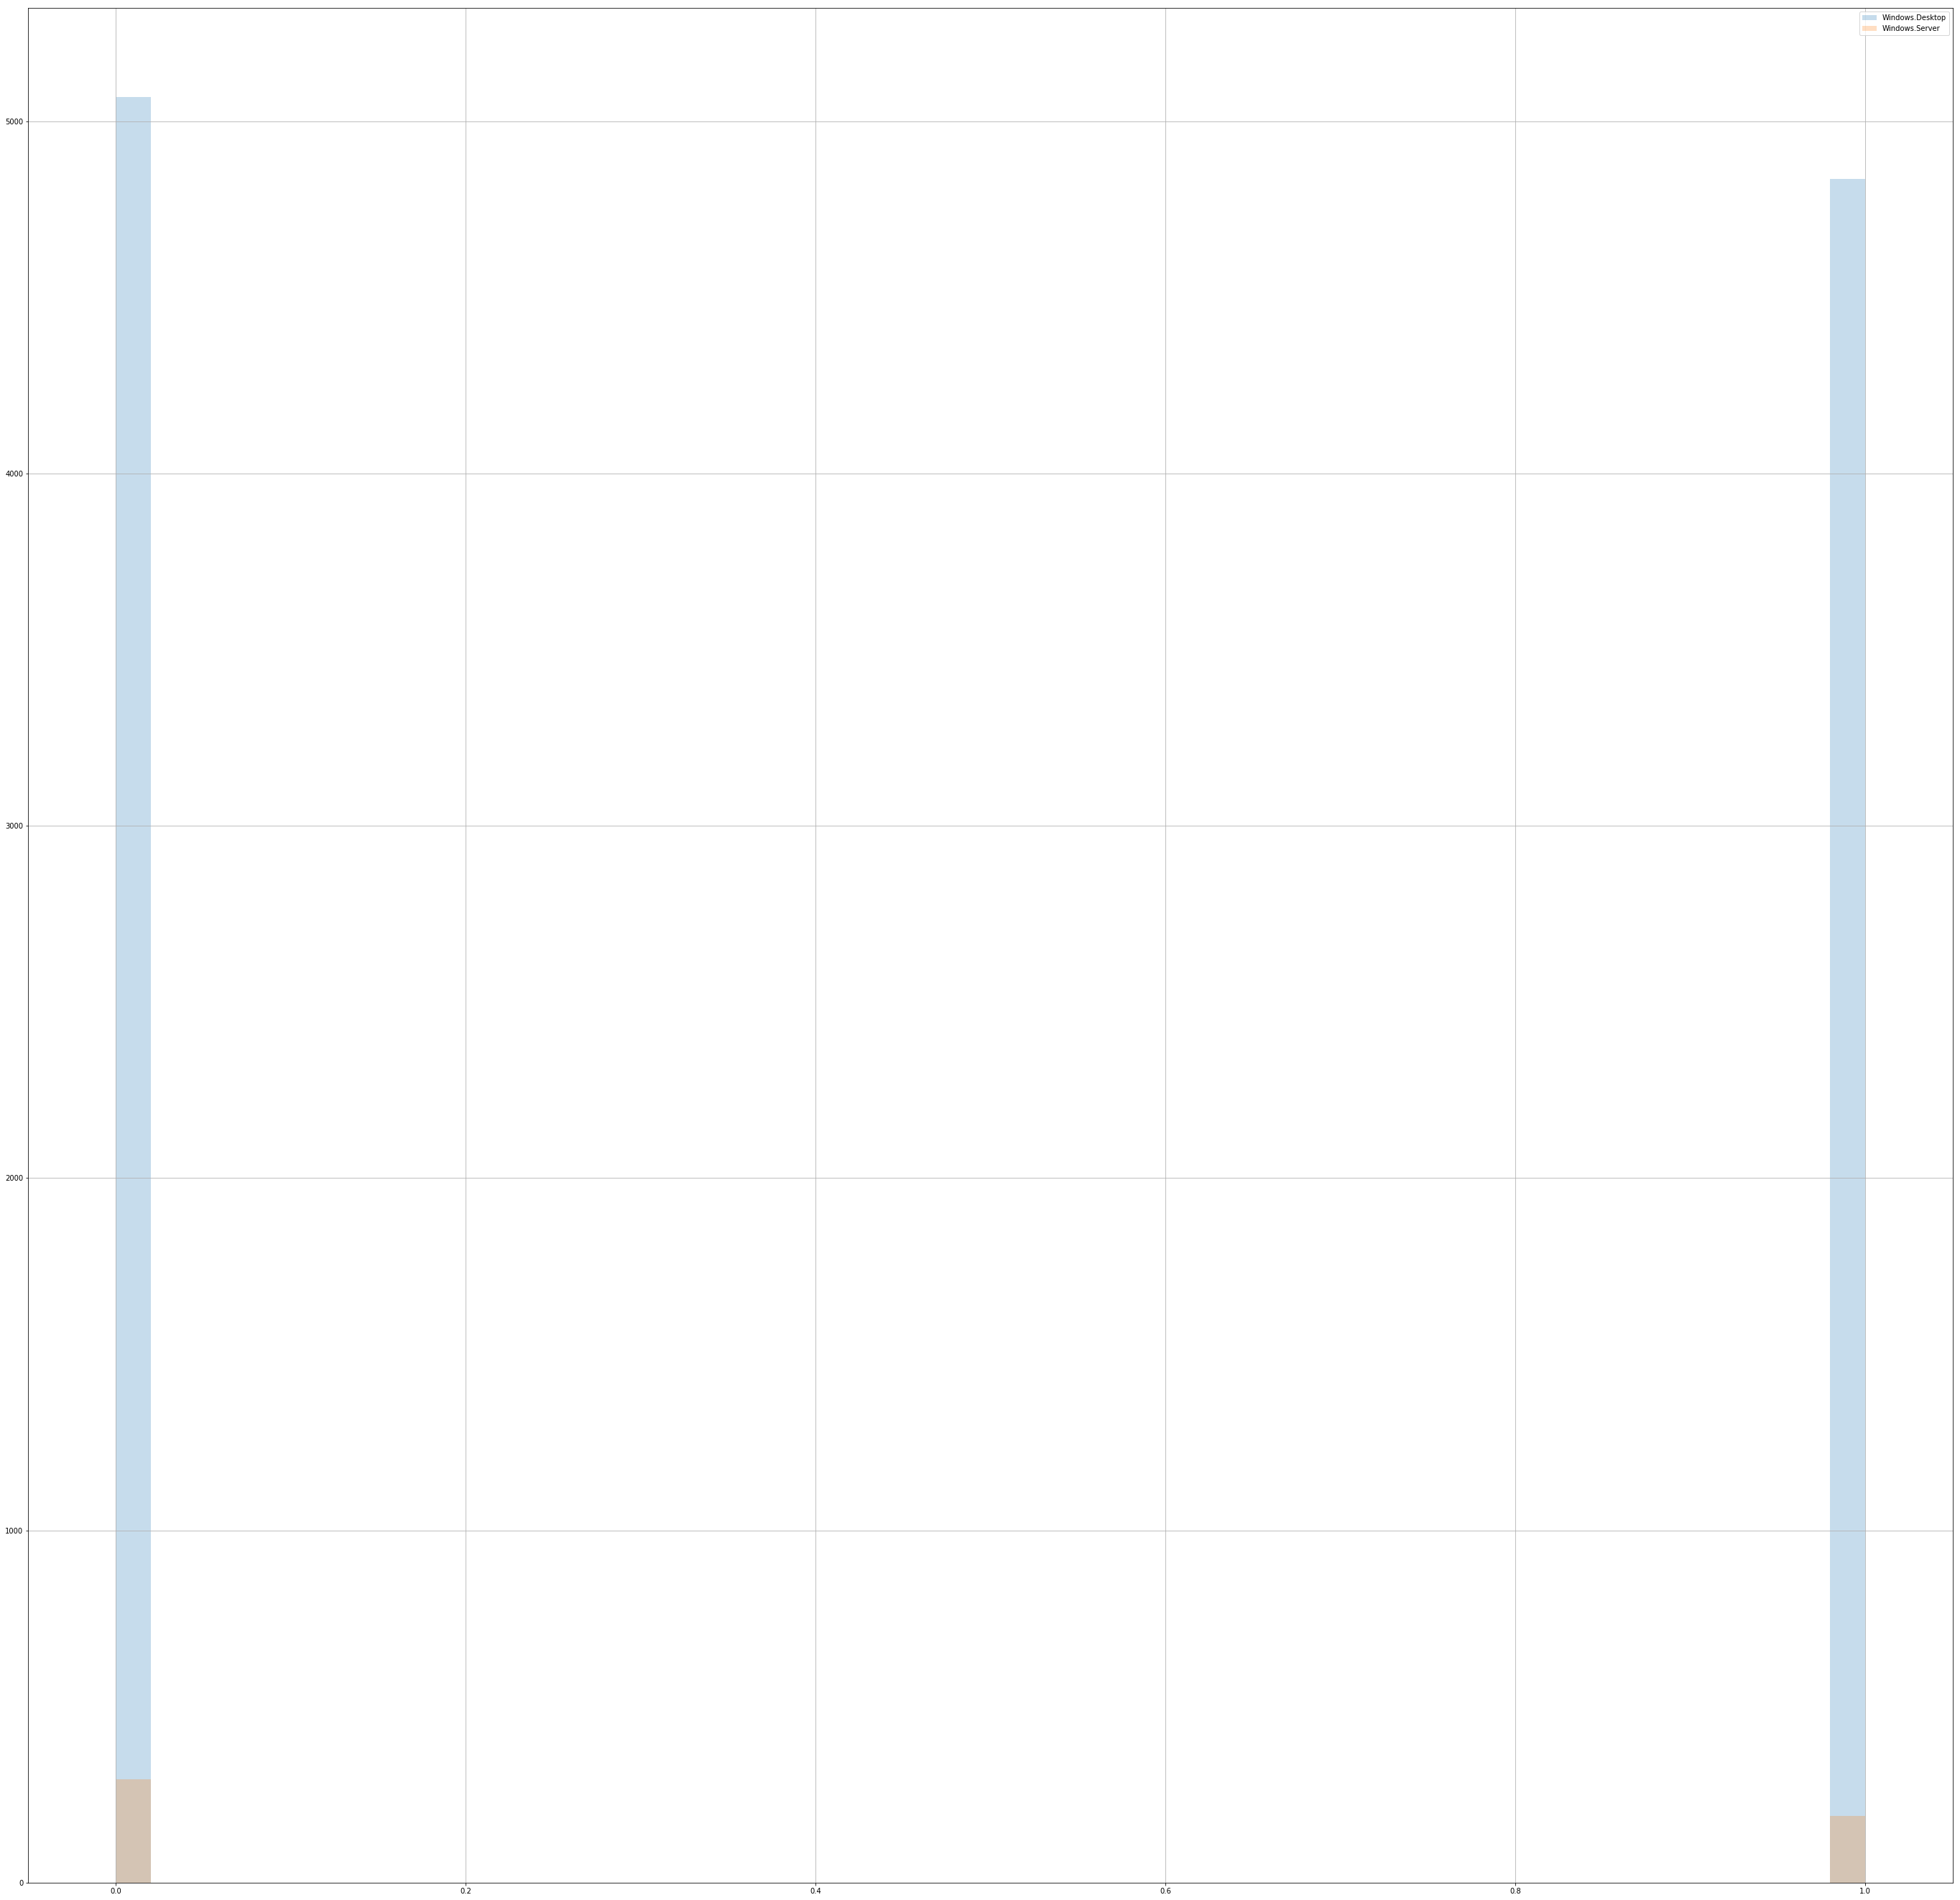

In [79]:
train_data['HasDetections'] = train_labels

filter=train_data['Platform']!='windows10'

groups = train_data[filter].groupby('Census_DeviceFamily').HasDetections

fig, ax = plt.subplots()

for k, v in groups:
    v.hist(label=k, alpha=.25, ax=ax, figsize=(48,48), bins=50)

ax.legend()
train_data = train_data.drop(columns='HasDetections')

In [23]:
# Additional encoding TBD
print("Columns to review NaN values:")
train_data.isna().any()[lambda x: x]

Columns to review NaN values:


Series([], dtype: bool)

In [81]:
# Let's get a feeling for range of values in the nominal categories

In [500]:
train_data[nominal_cols].describe().transpose()

ValueError: Cannot describe a DataFrame without columns

In [83]:
# Encode nominal variables as labeled strings
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i, col in enumerate(nominal_cols):
    train_data[col] = encoder.fit_transform(train_data[col].astype(str))
    dev_data[col] = encoder.fit_transform(dev_data[col].astype(str))
    test_data[col] = encoder.fit_transform(test_data[col].astype(str))

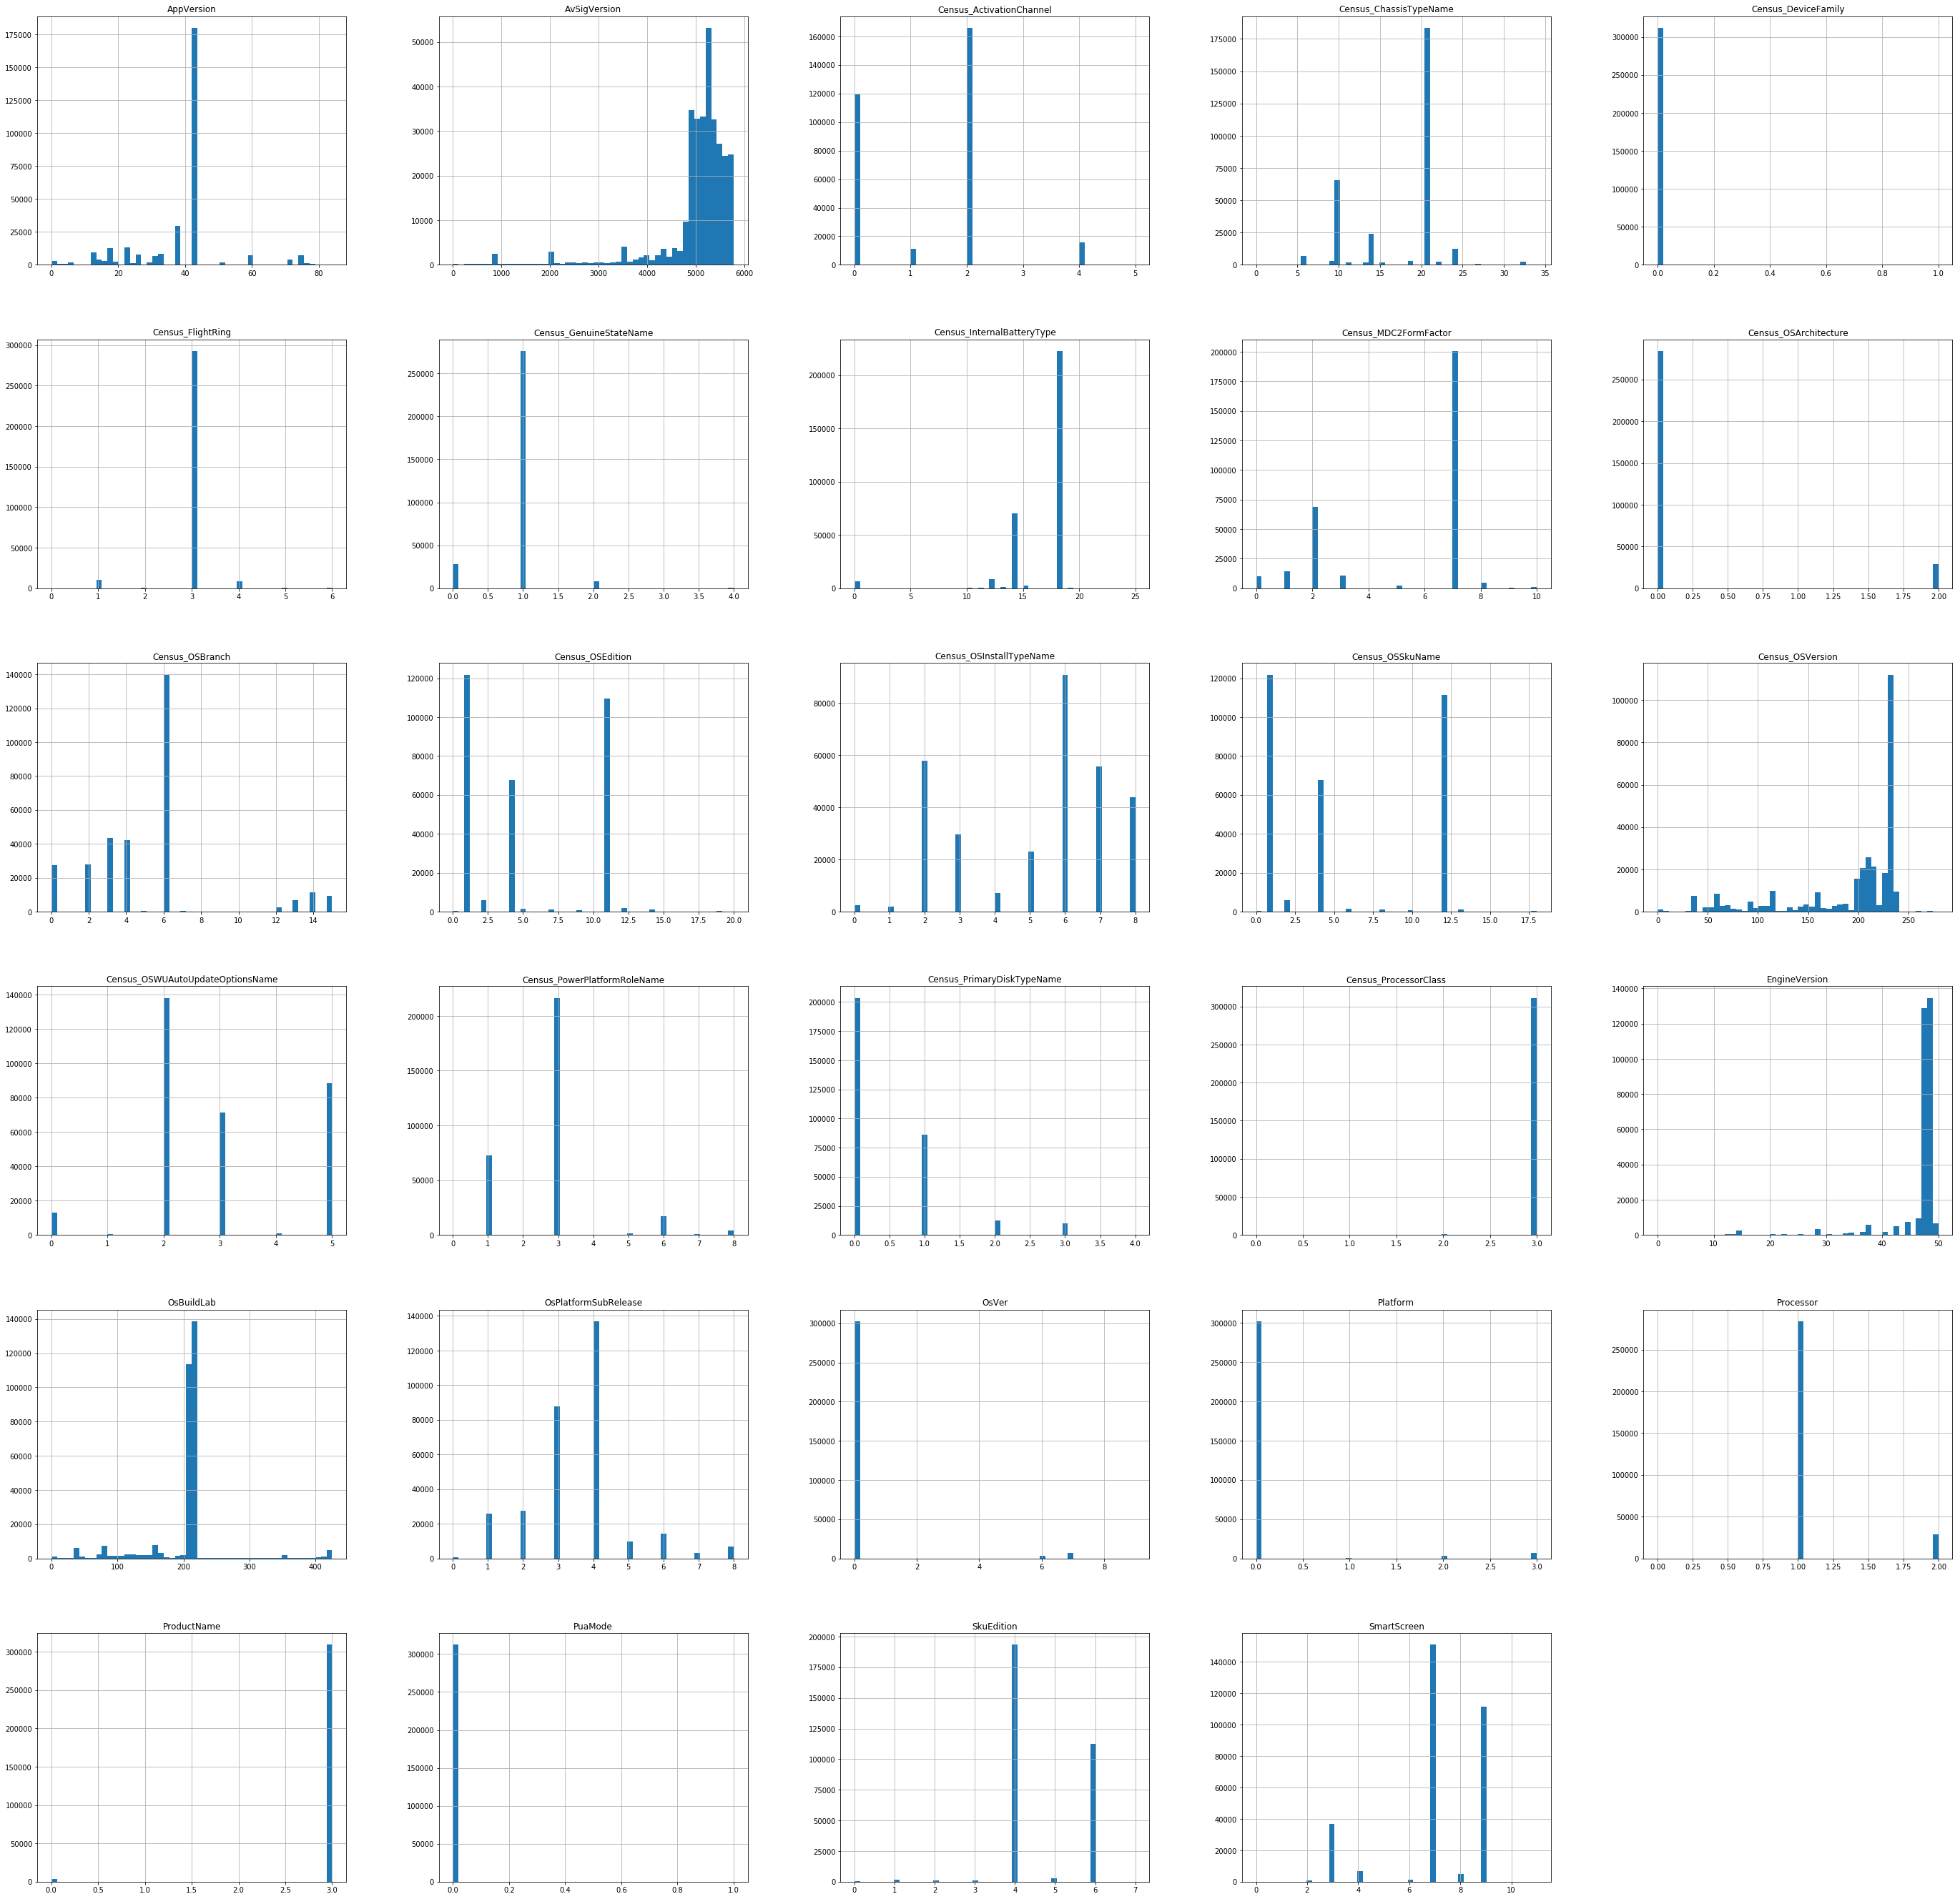

In [84]:
train_data[nominal_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [85]:
for i, col in enumerate(nominal_cols):
    print('The number of values for {:} = {:}'.format(col, (len(list(train_data[col].unique())))))

The number of values for ProductName = 4
The number of values for EngineVersion = 51
The number of values for AppVersion = 85
The number of values for AvSigVersion = 5784
The number of values for Platform = 4
The number of values for Processor = 3
The number of values for OsVer = 10
The number of values for OsPlatformSubRelease = 9
The number of values for OsBuildLab = 426
The number of values for SkuEdition = 8
The number of values for PuaMode = 2
The number of values for SmartScreen = 12
The number of values for Census_MDC2FormFactor = 11
The number of values for Census_DeviceFamily = 2
The number of values for Census_ProcessorClass = 4
The number of values for Census_PrimaryDiskTypeName = 5
The number of values for Census_ChassisTypeName = 35
The number of values for Census_PowerPlatformRoleName = 9
The number of values for Census_InternalBatteryType = 26
The number of values for Census_OSVersion = 281
The number of values for Census_OSArchitecture = 3
The number of values for Censu

In [86]:
correlated_cols = []
for i, col in enumerate(nominal_cols):
    corr = train_labels.corr(train_data[col])
    if(corr > 0.05  or corr < -0.05):
        star='(*)' # flag the highly correlated nominal variables
        correlated_cols.append(col)
    else:
        star=''
    print('The correlation of {:} with the outcome variable is {:7.6f}{:}'.format(col, corr, star))

The correlation of ProductName with the outcome variable is 0.004787
The correlation of EngineVersion with the outcome variable is 0.049902
The correlation of AppVersion with the outcome variable is 0.021835
The correlation of AvSigVersion with the outcome variable is 0.053625(*)
The correlation of Platform with the outcome variable is -0.004381
The correlation of Processor with the outcome variable is -0.074339(*)
The correlation of OsVer with the outcome variable is -0.003990
The correlation of OsPlatformSubRelease with the outcome variable is 0.015295
The correlation of OsBuildLab with the outcome variable is 0.014948
The correlation of SkuEdition with the outcome variable is 0.016260
The correlation of PuaMode with the outcome variable is 0.007944
The correlation of SmartScreen with the outcome variable is -0.169002(*)
The correlation of Census_MDC2FormFactor with the outcome variable is -0.008530
The correlation of Census_DeviceFamily with the outcome variable is -0.008450
The cor

In [19]:
correlated_cols

NameError: name 'correlated_cols' is not defined

In [24]:
train_data[continuous_cols].describe().transpose()

count          mean           std           min  \
ProductName                312251.0  3.969323e+00  3.017597e-01  1.000000e+00   
EngineVersion              312251.0  6.410886e+01  5.349947e+00  6.000000e+00   
AppVersion                 312251.0  5.219964e+01  1.937387e+01  0.000000e+00   
AvSigVersion               312251.0  7.755423e+03  9.214312e+02  0.000000e+00   
RtpStateBitfield           312251.0  3.898902e+00  6.305501e-01  0.000000e+00   
...                             ...           ...           ...           ...   
AppVersion_combined        312251.0  4.159166e+07  3.282775e+05  4.040030e+07   
AvSigVersion_combined      312251.0  1.027231e+04  3.725793e+01  0.000000e+00   
Census_OSVersion_combined  312251.0  1.001583e+07  1.960701e+03  1.001024e+07   
OsVer_combined             312251.0  9.873853e+04  6.969152e+03  6.010000e+04   
OsBuildLab_combined        312251.0  1.572366e+10  2.182564e+09  7.600164e+09   

                                    25%           50%           75%  \
ProductName                4.000000e+00  4.000000e+00  4.000000e+00   
EngineVersion              6.500000e+01  6.500000e+01  6.600000e+01   
AppVersion                 5.300000e+01  5.900000e+01  5.900000e+01   
AvSigVersion               7.700000e+03  7.973000e+03  8.176000e+03   
RtpStateBitfield           4.000000e+00  4.000000e+00  4.000000e+00   
...                                 ...           ...           ...   
AppVersion_combined        4.131713e+07  4.180181e+07  4.180181e+07   
AvSigVersion_combined      1.027307e+04  1.027317e+04  1.027508e+04   
Census_OSVersion_combined  1.001506e+07  1.001630e+07  1.001713e+07   
OsVer_combined             1.000000e+05  1.000000e+05  1.000000e+05   
OsBuildLab_combined        1.506300e+10  1.629900e+10  1.713400e+10   

                                    max  
ProductName                4.000000e+00  
EngineVersion              6.800000e+01  
AppVersion                 1.080000e+02  
AvSigVersion               8.530000e+03  
RtpStateBitfield           5.000000e+00  
...                                 ...  
AppVersion_combined        4.180181e+07  
AvSigVersion_combined      1.027701e+04  
Census_OSVersion_combined  1.001824e+07  
OsVer_combined             1.000040e+05  
OsBuildLab_combined        1.824201e+10  

[83 rows x 8 columns]

In [89]:
# Andrew's temporary draft for StandardScaler.  Pasting in Kevin's variation, as well:

#inverse_cols = [i for i in train_data.columns if i not in numeric_cols]
#features = train_data[numeric_cols]
#ct = ColumnTransformer([('transform', StandardScaler(), numeric_cols)], remainder='passthrough')
#ct.fit_transform(features)
#train_data_scaled = pd.DataFrame(features, index=train_data.index, columns=numeric_cols)
#inverse_data = pd.DataFrame(train_data[inverse_cols], index=train_data.index, columns=inverse_cols)
#frames = [train_data_scaled, inverse_data]
#train_data2 = pd.concat(frames, sort=False)
#train_data2.describe()

# Kevin's version:
from sklearn.preprocessing import StandardScaler
features = train_data[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
train_data[continuous_cols] = features

#from sklearn.preprocessing import StandardScaler
#train_data[numeric_cols] = data[[numeric_cols].apply(
#                           lambda x: StandardScaler().fit_transform(x))


features = dev_data[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
dev_data[continuous_cols] = features

features = test_data[continuous_cols]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
test_data[continuous_cols] = features


#for i, col in enumerate(numeric_cols):
#    standard_scaler = StandardScaler().fit(train_data[col].values)
#    train_data[col] = standard_scaler.transform(train_data[col])
#    test_data[col] = standard_scaler.transform(test_data[col])



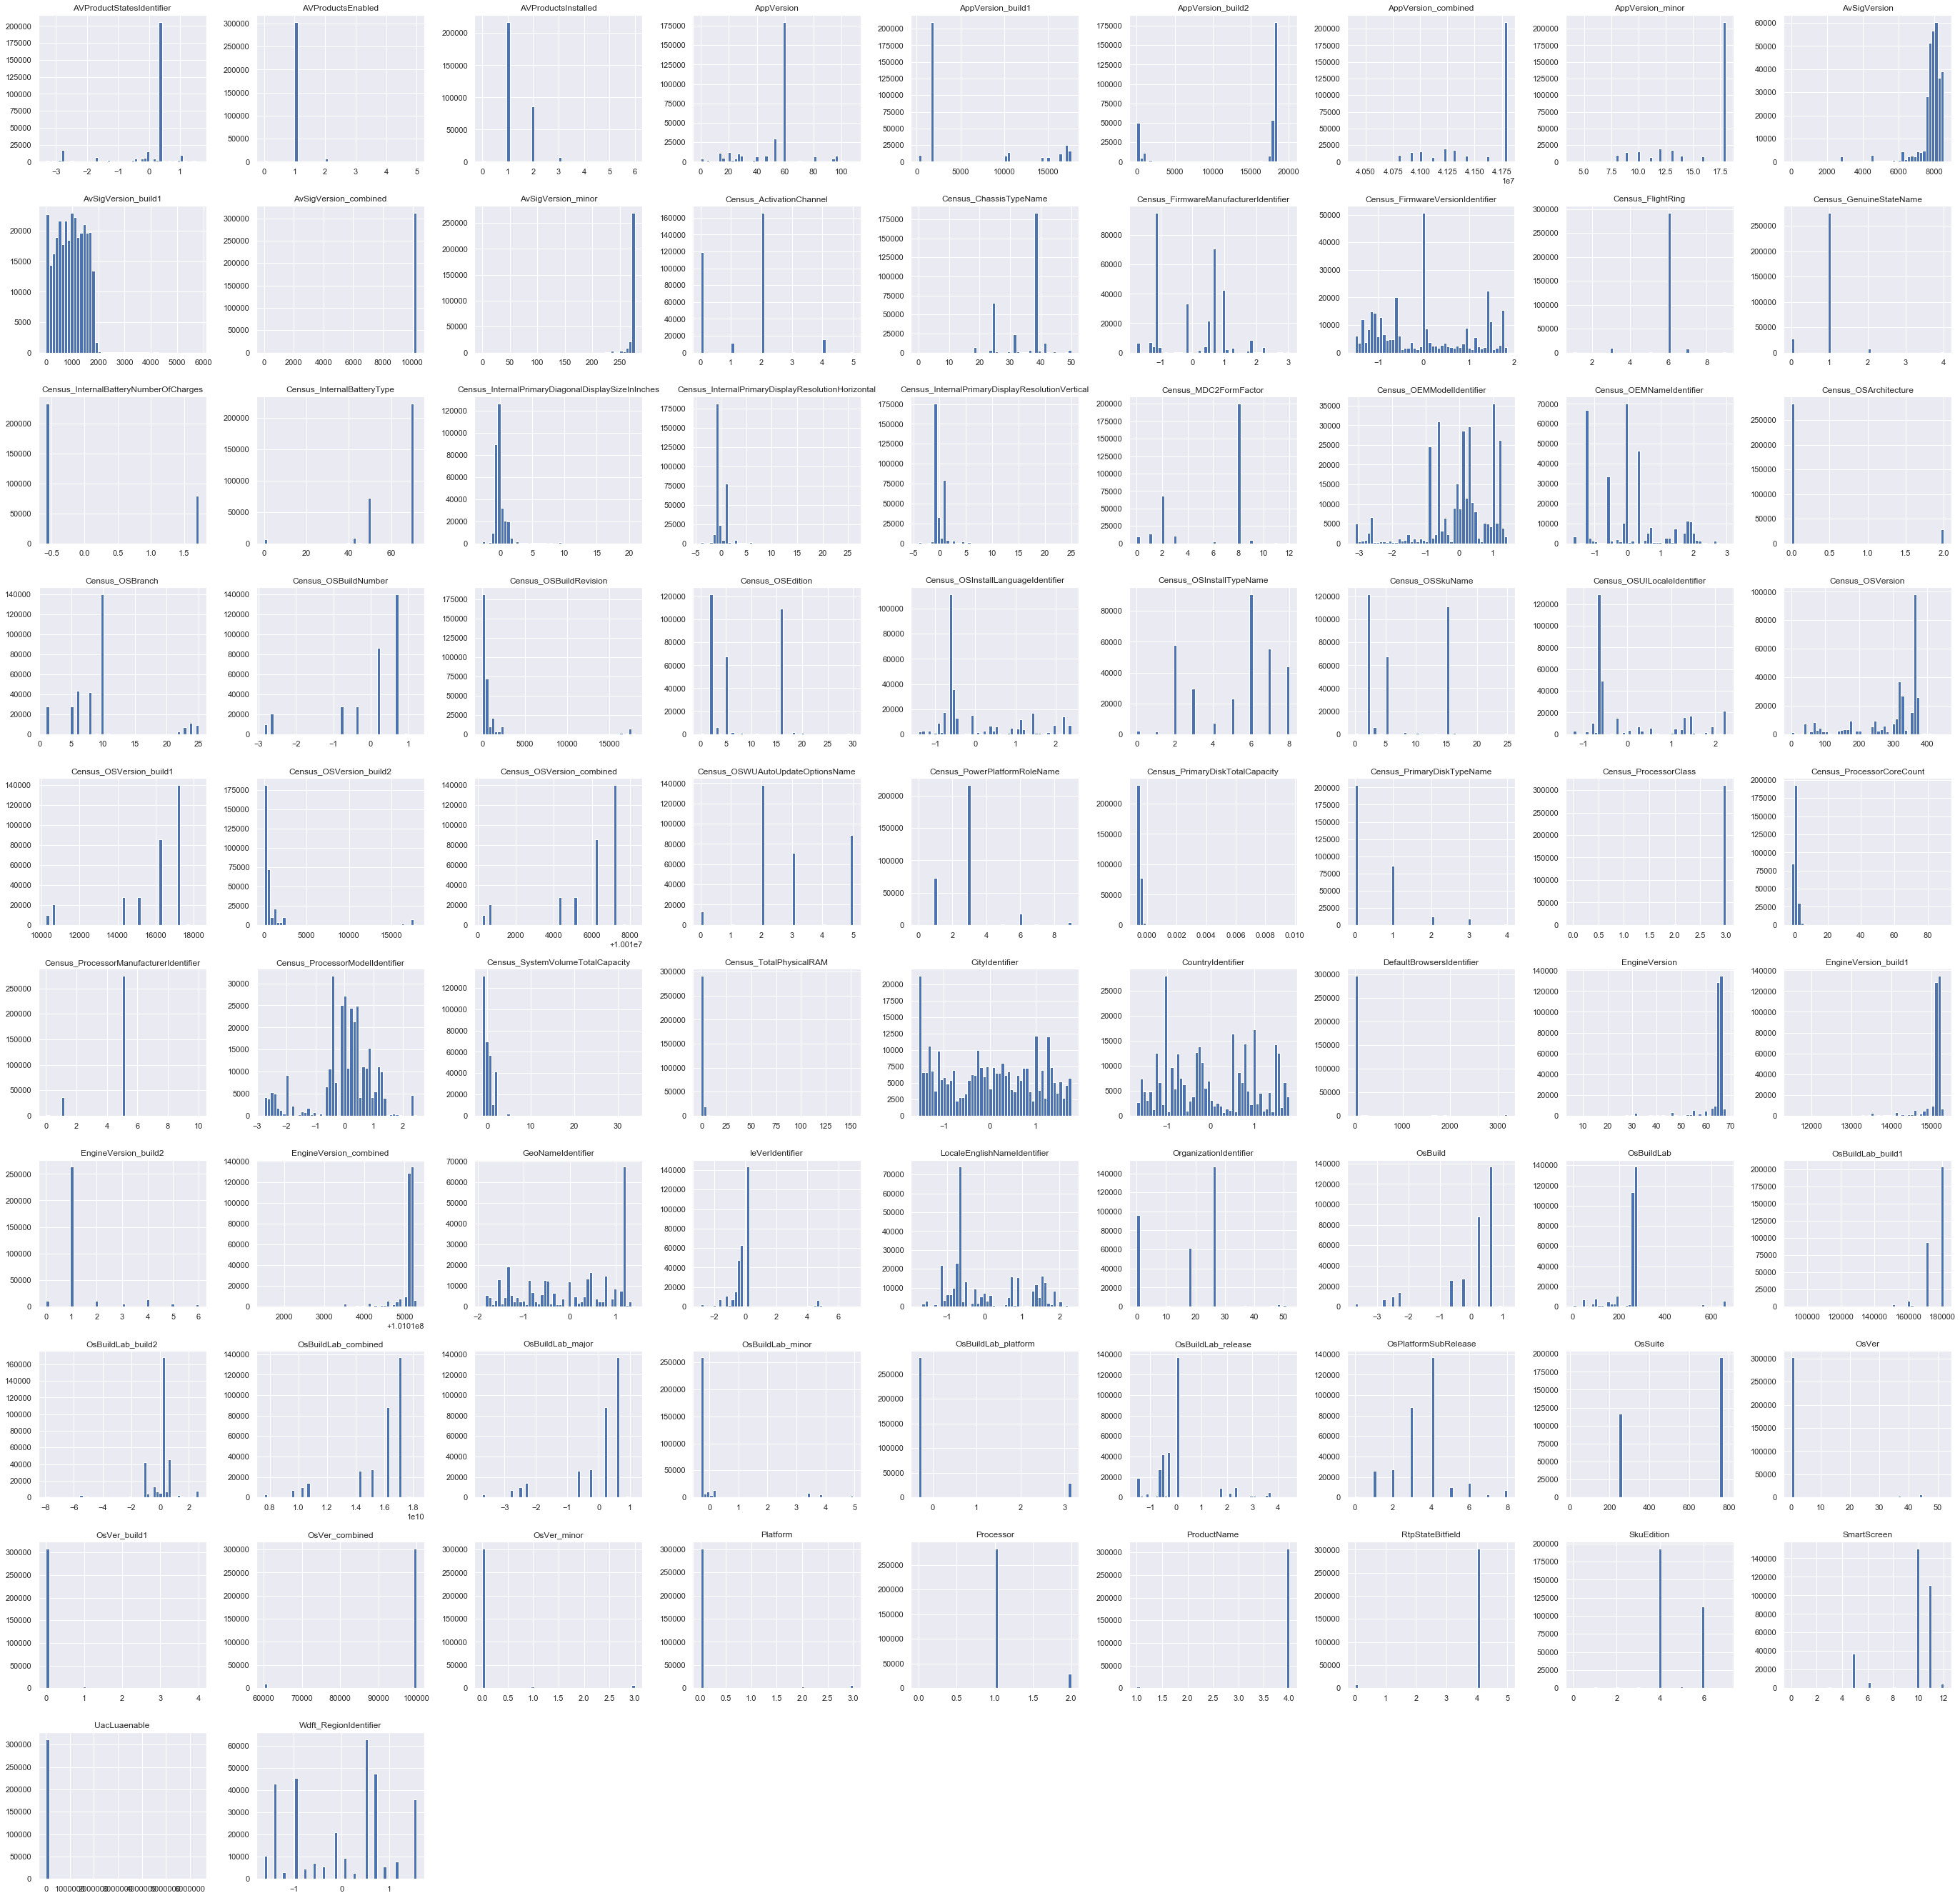

In [25]:
train_data[continuous_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [26]:
train_data[binary_cols].describe().transpose()

count      mean  \
PuaMode                                             312251.0  1.999670   
Census_DeviceFamily                                 312251.0  1.001550   
RtpStateBitfield_wasna                              312251.0  0.003657   
DefaultBrowsersIdentifier_wasna                     312251.0  0.950934   
AVProductStatesIdentifier_wasna                     312251.0  0.003968   
AVProductsInstalled_wasna                           312251.0  0.003968   
AVProductsEnabled_wasna                             312251.0  0.003968   
CityIdentifier_wasna                                312251.0  0.036186   
OrganizationIdentifier_wasna                        312251.0  0.308351   
GeoNameIdentifier_wasna                             312251.0  0.000035   
IsProtected_wasna                                   312251.0  0.003936   
SMode_wasna                                         312251.0  0.059814   
IeVerIdentifier_wasna                               312251.0  0.006520   
Firewall_wasna                                      312251.0  0.009873   
UacLuaenable_wasna                                  312251.0  0.001121   
Census_OEMNameIdentifier_wasna                      312251.0  0.010729   
Census_OEMModelIdentifier_wasna                     312251.0  0.011427   
Census_ProcessorCoreCount_wasna                     312251.0  0.004557   
Census_ProcessorManufacturerIdentifier_wasna        312251.0  0.004557   
Census_ProcessorModelIdentifier_wasna               312251.0  0.004560   
Census_PrimaryDiskTotalCapacity_wasna               312251.0  0.005979   
Census_SystemVolumeTotalCapacity_wasna              312251.0  0.005979   
Census_TotalPhysicalRAM_wasna                       312251.0  0.009146   
Census_InternalPrimaryDiagonalDisplaySizeInInch...  312251.0  0.005422   
Census_InternalPrimaryDisplayResolutionHorizont...  312251.0  0.005412   
Census_InternalPrimaryDisplayResolutionVertical...  312251.0  0.005412   
Census_InternalBatteryNumberOfCharges_wasna         312251.0  0.030299   
Census_OSInstallLanguageIdentifier_wasna            312251.0  0.006809   
Census_IsFlightingInternal_wasna                    312251.0  0.830957   
Census_IsFlightsDisabled_wasna                      312251.0  0.017976   
Census_ThresholdOptIn_wasna                         312251.0  0.636139   
Census_FirmwareManufacturerIdentifier_wasna         312251.0  0.020759   
Census_IsWIMBootEnabled_wasna                       312251.0  0.635255   
Census_IsVirtualDevice_wasna                        312251.0  0.001771   
Census_IsAlwaysOnAlwaysConnectedCapable_wasna       312251.0  0.008074   
Wdft_IsGamer_wasna                                  312251.0  0.033761   
Wdft_RegionIdentifier_wasna                         312251.0  0.033761   
Census_FirmwareVersionIdentifier_wasna              312251.0  0.018142   
IsBeta                                              312251.0  0.000019   
IsSxsPassiveMode                                    312251.0  0.017476   
HasTpm                                              312251.0  0.988343   
AutoSampleOptIn                                     312251.0  0.000038   
Census_HasOpticalDiskDrive                          312251.0  0.076506   
Census_IsPortableOperatingSystem                    312251.0  0.000512   
Census_IsSecureBootEnabled                          312251.0  0.485715   
Census_IsTouchEnabled                               312251.0  0.125601   
Census_IsPenCapable                                 312251.0  0.038082   
AvSigVersion_major                                  312251.0  0.999987   
OsVer_major                                         312251.0  9.873102   
OsVer_build2                                        312251.0  0.000010   
IsProtected                                         312251.0       NaN   
SMode                                               312251.0  0.000445   
Firewall                                            312251.0       NaN   
Census_IsFlightingInternal                          312251.

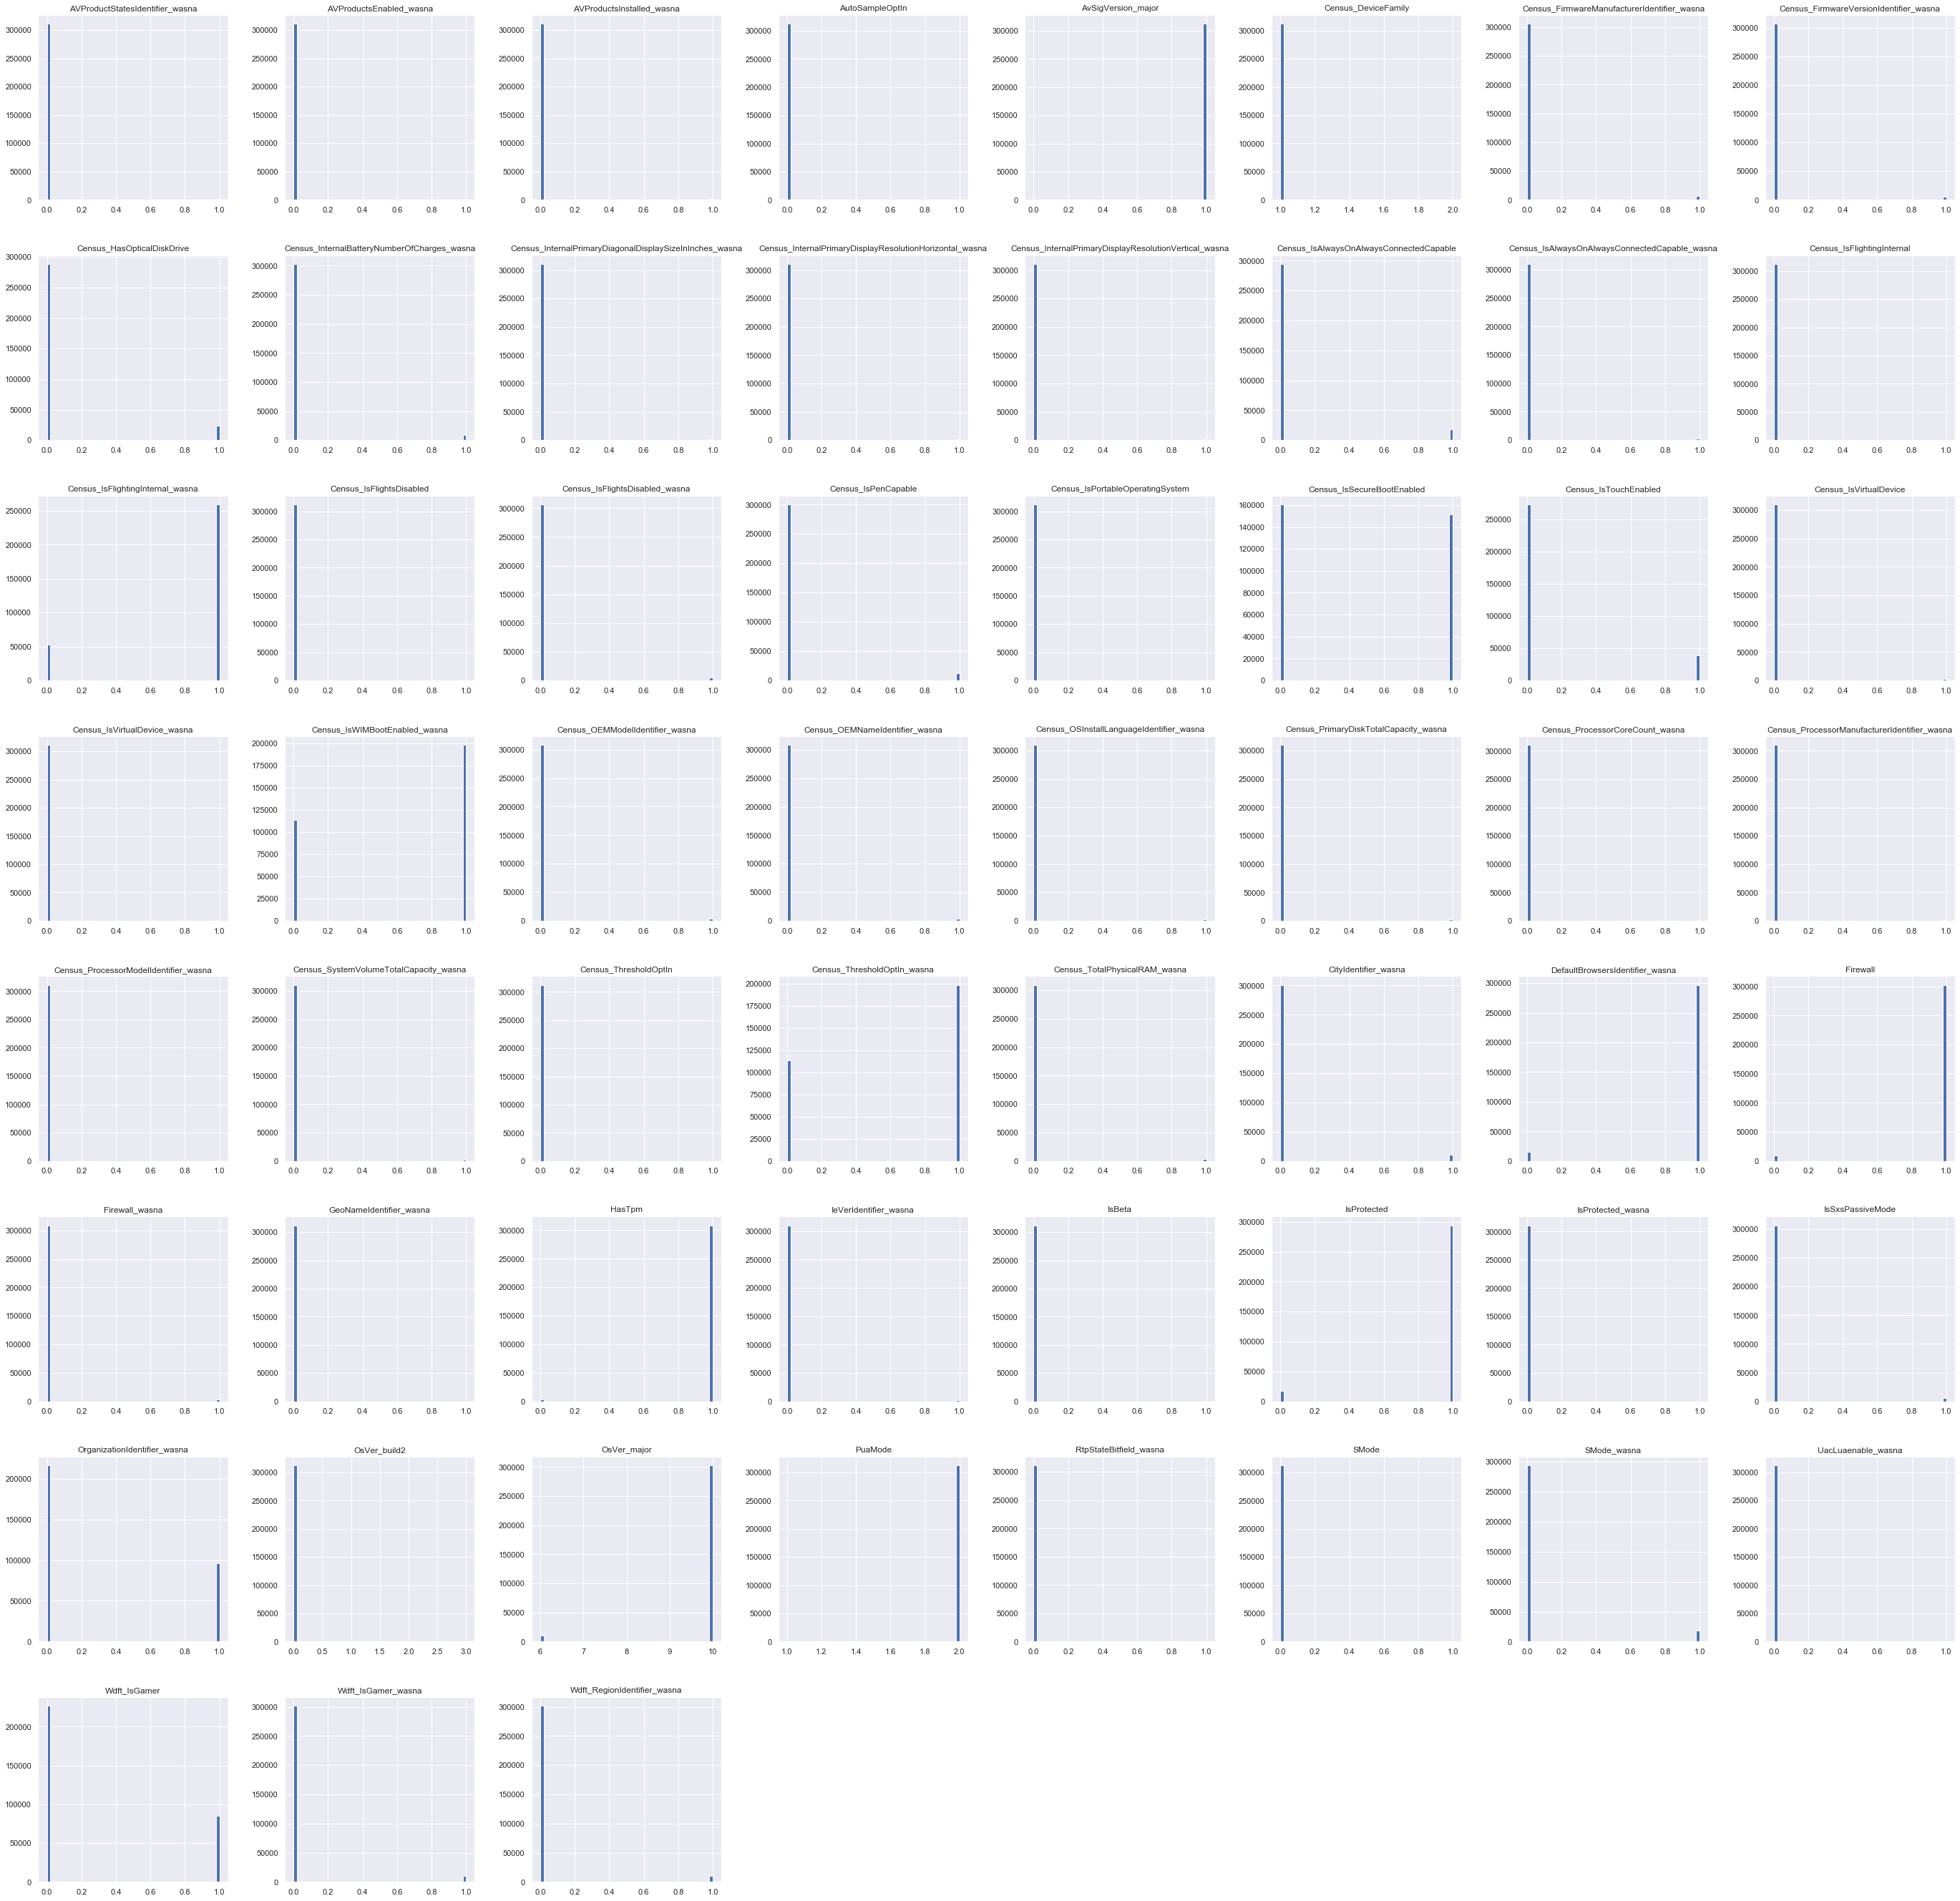

In [27]:
train_data[binary_cols].hist(figsize=(48,48), bins=50)
plt.show()

In [28]:
correlated_cols=[]
for i, col in enumerate(numeric_cols):
    corr = train_labels.corr(train_data[col])
    if(corr > 0.05  or corr < -0.05):
        star='(*)' # flag the highly correlated numeric variables
        correlated_cols.append(col)
    else:
        star=''
#    print('The correlation of {:} with the outcome variable is {:7.6f}{:}'.format(col, corr, star))

In [424]:
# Impute missing values for correlated columns

#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy = 'median')

#imputer.fit(train_data[correlated_cols])
#train_data_corr = imputer.transform(train_data[correlated_cols])
#dev_data_corr = imputer.transform(dev_data[correlated_cols])
#test_data_corr = imputer.transform(test_data[correlated_cols])


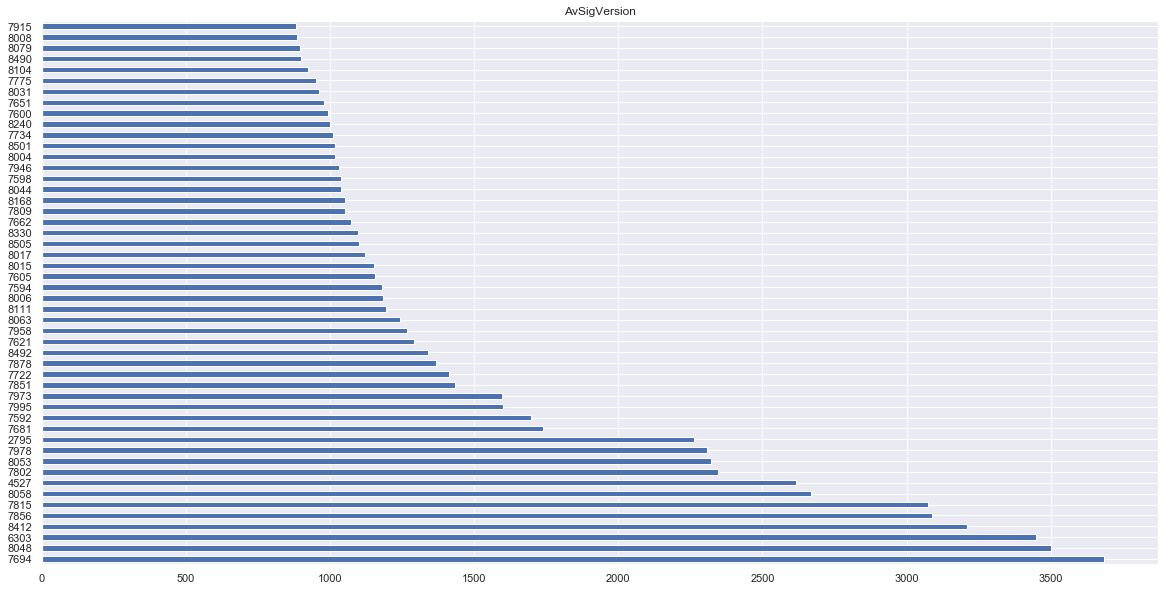

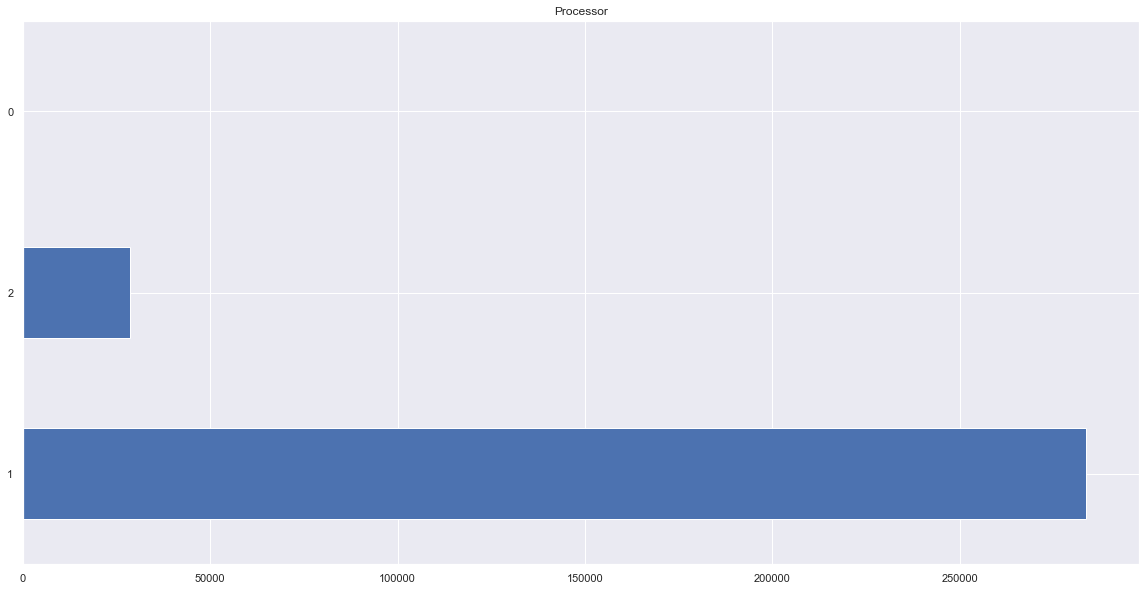

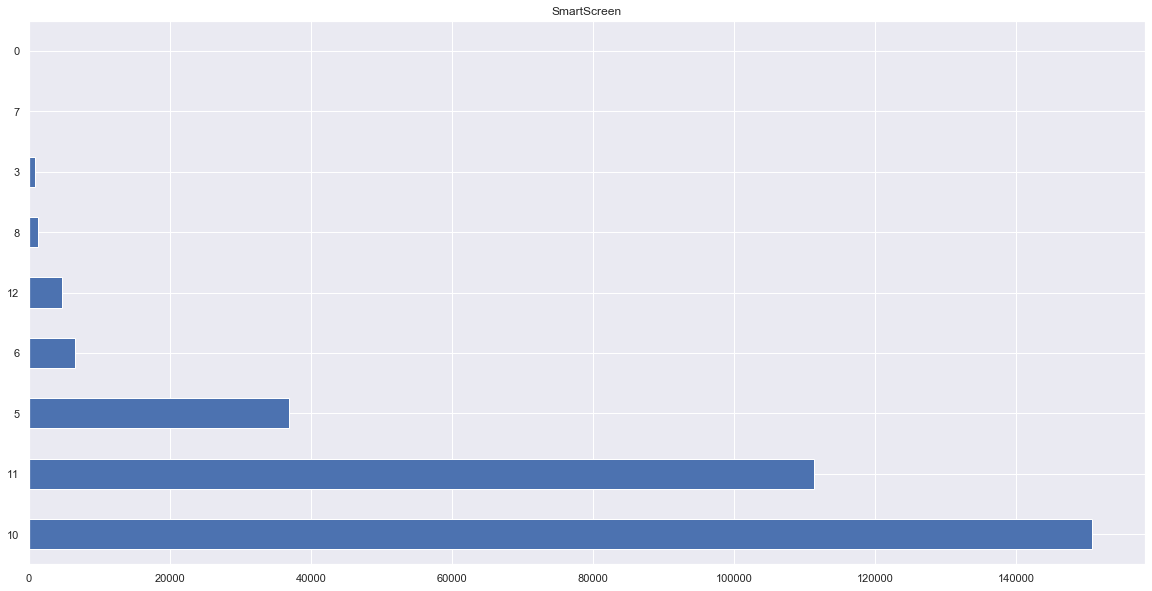

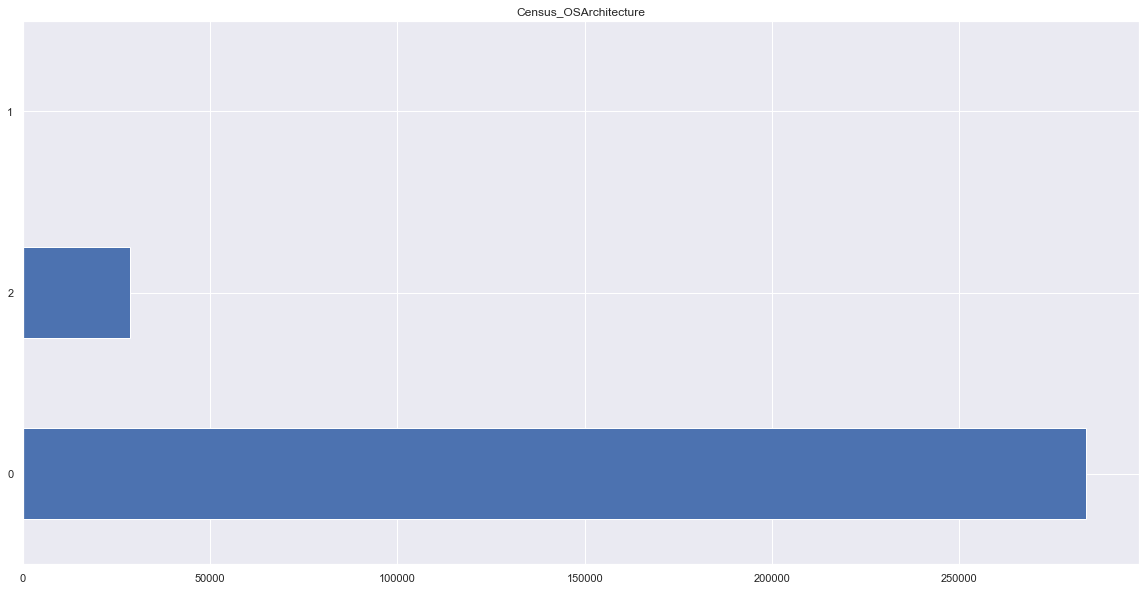

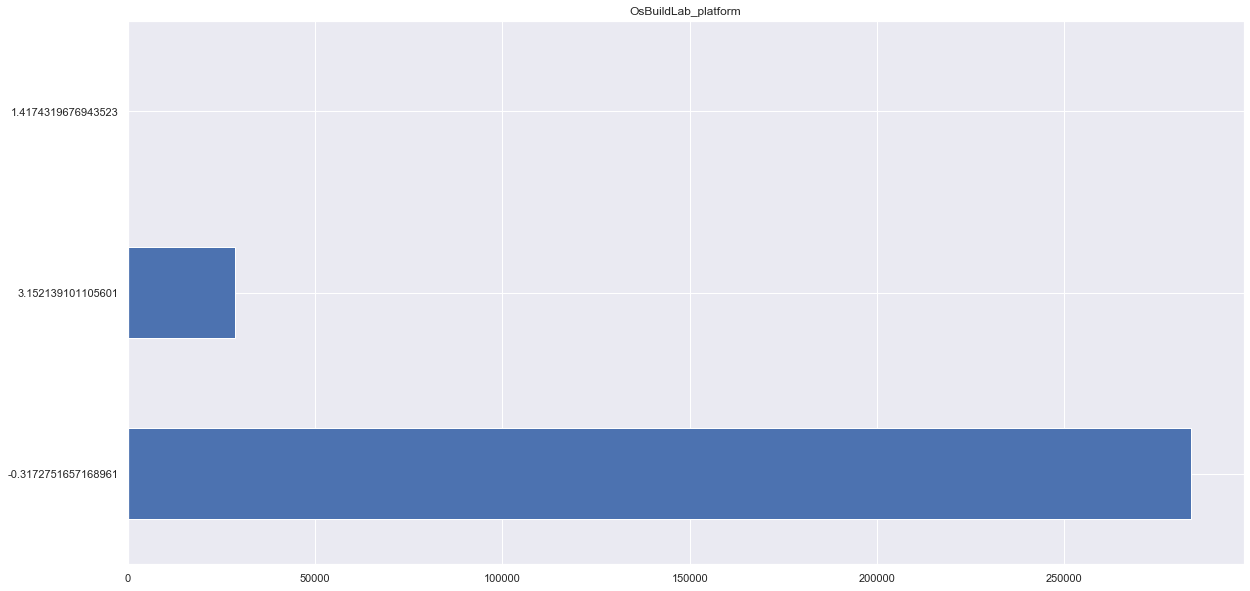

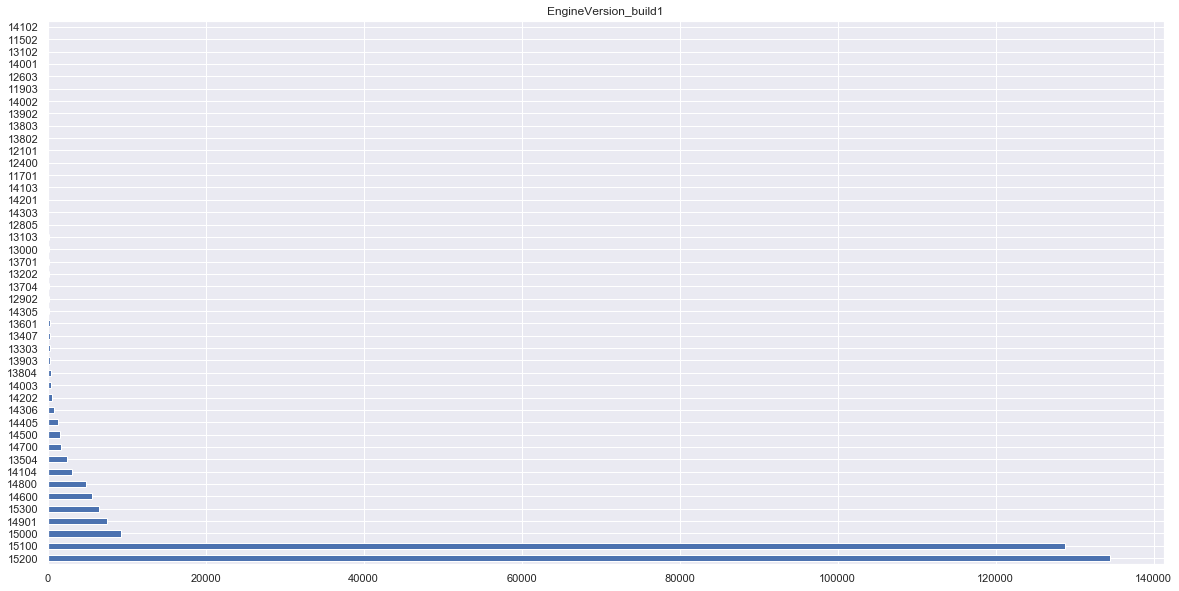

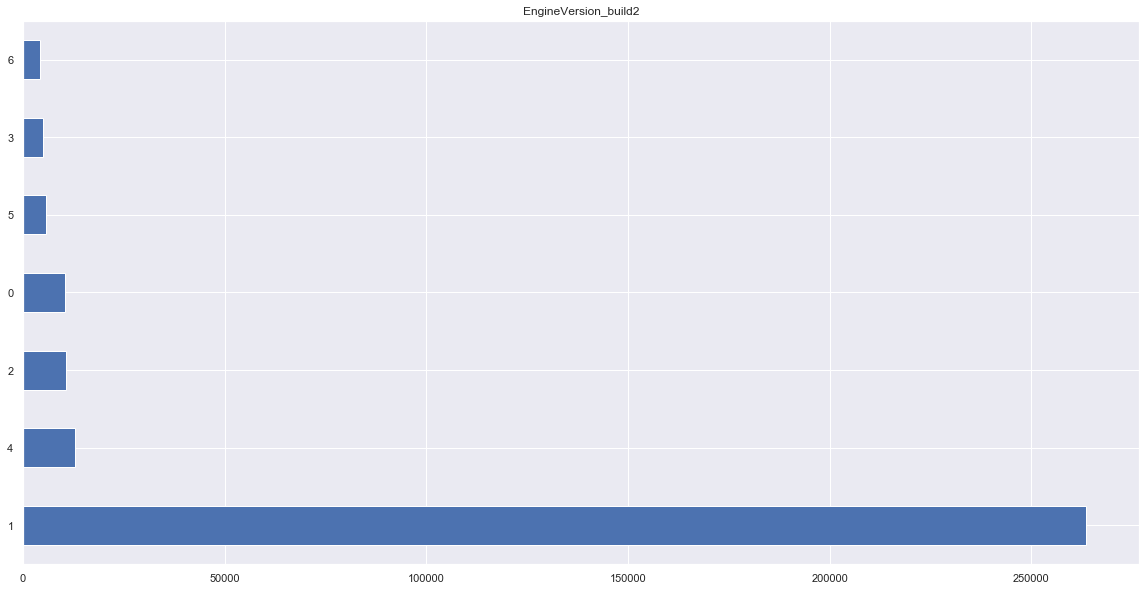

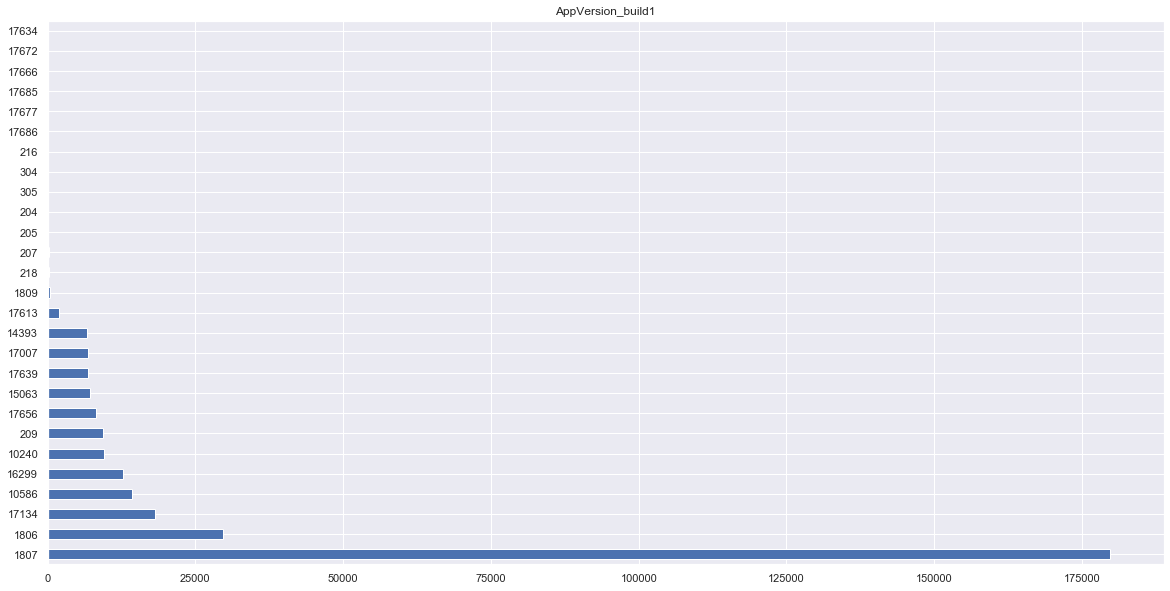

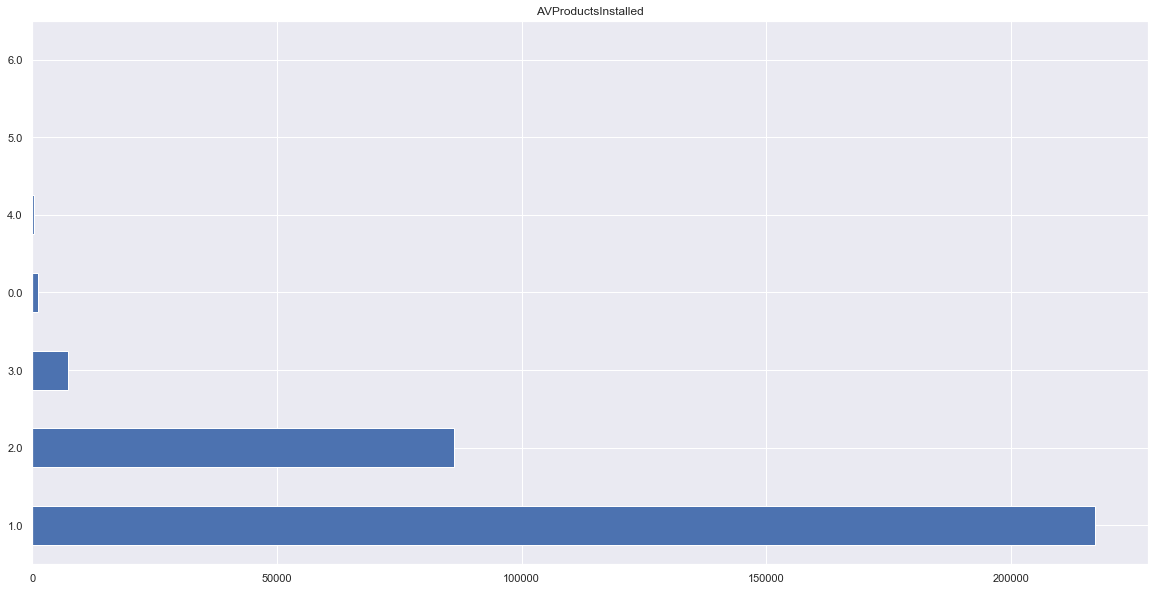

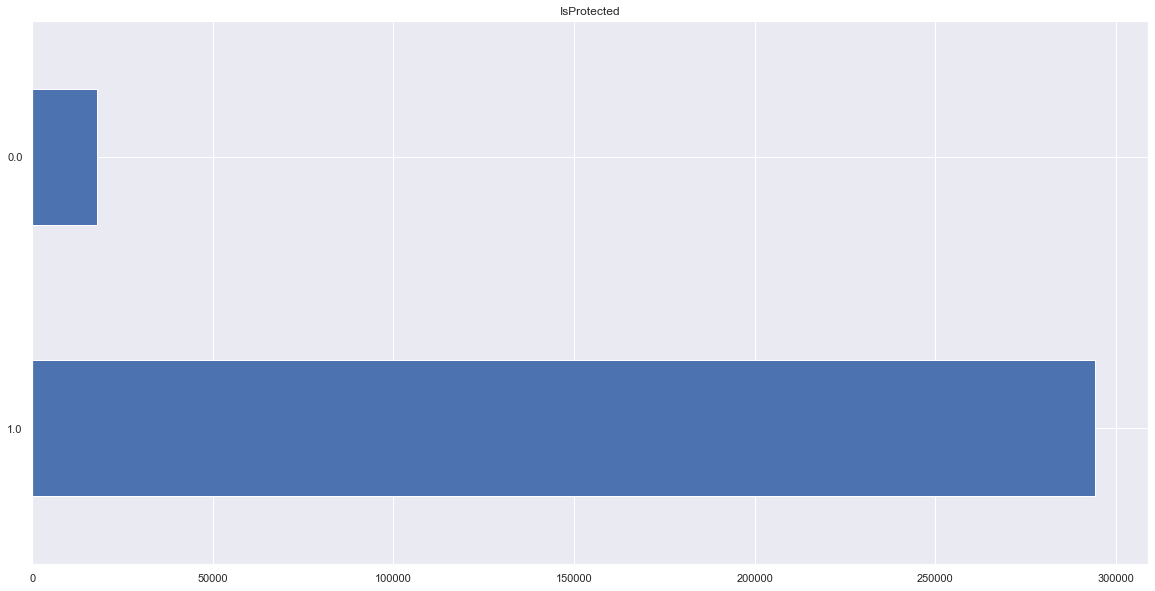

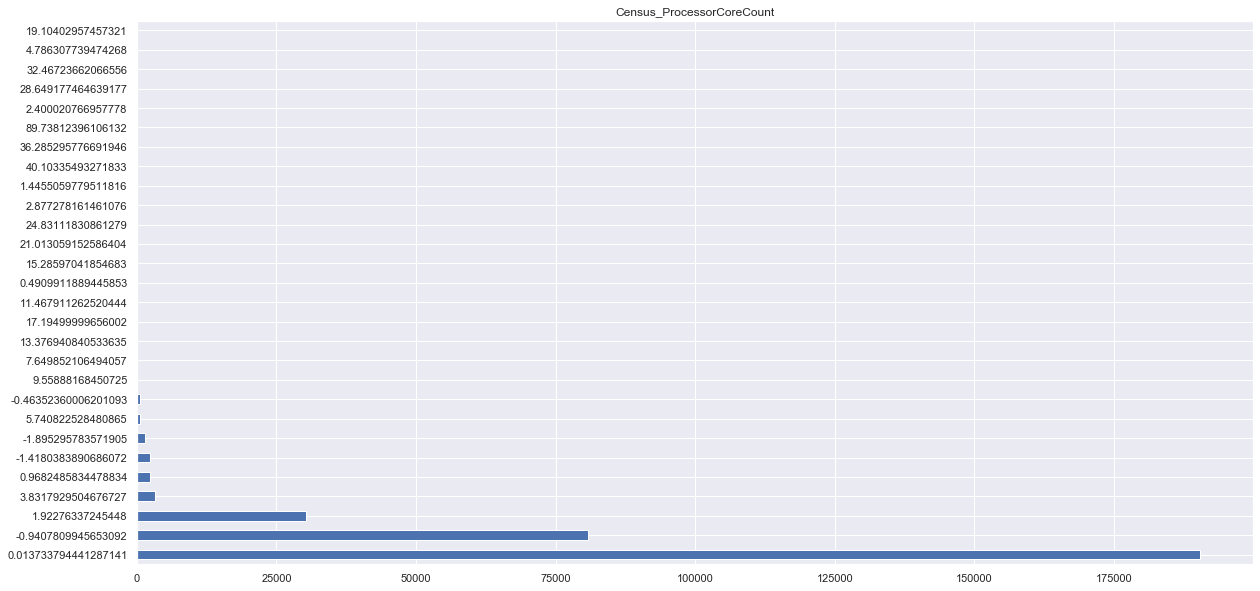

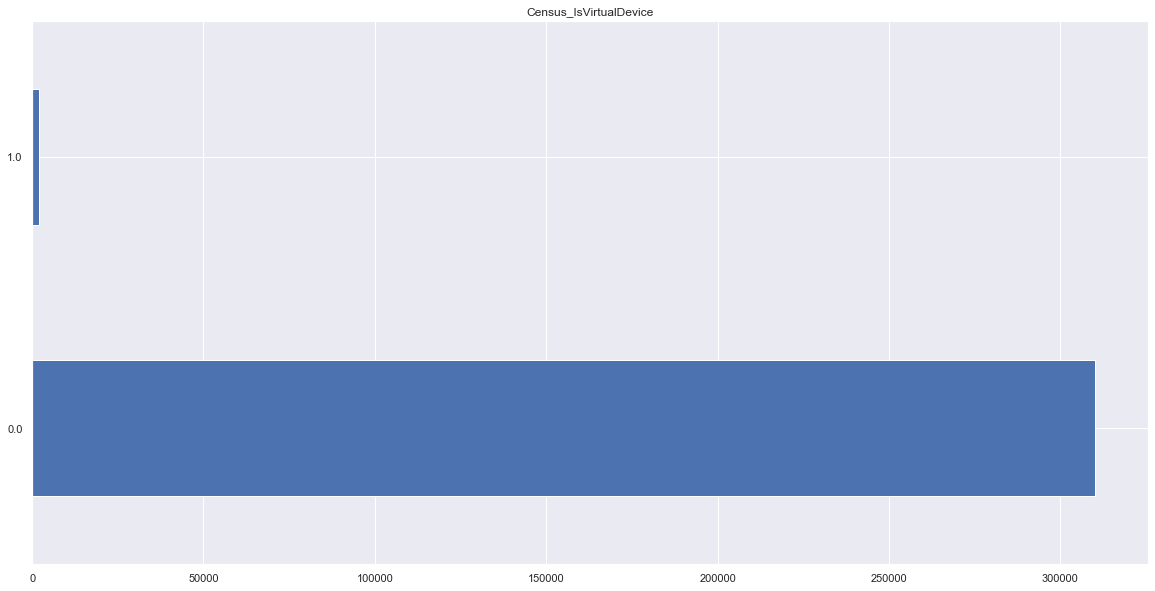

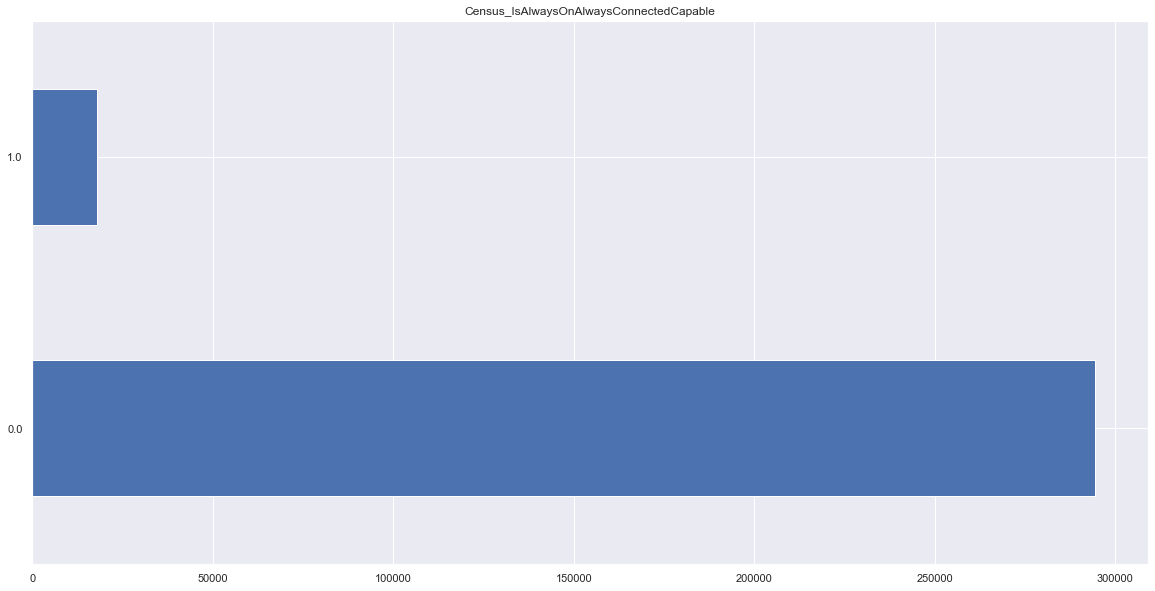

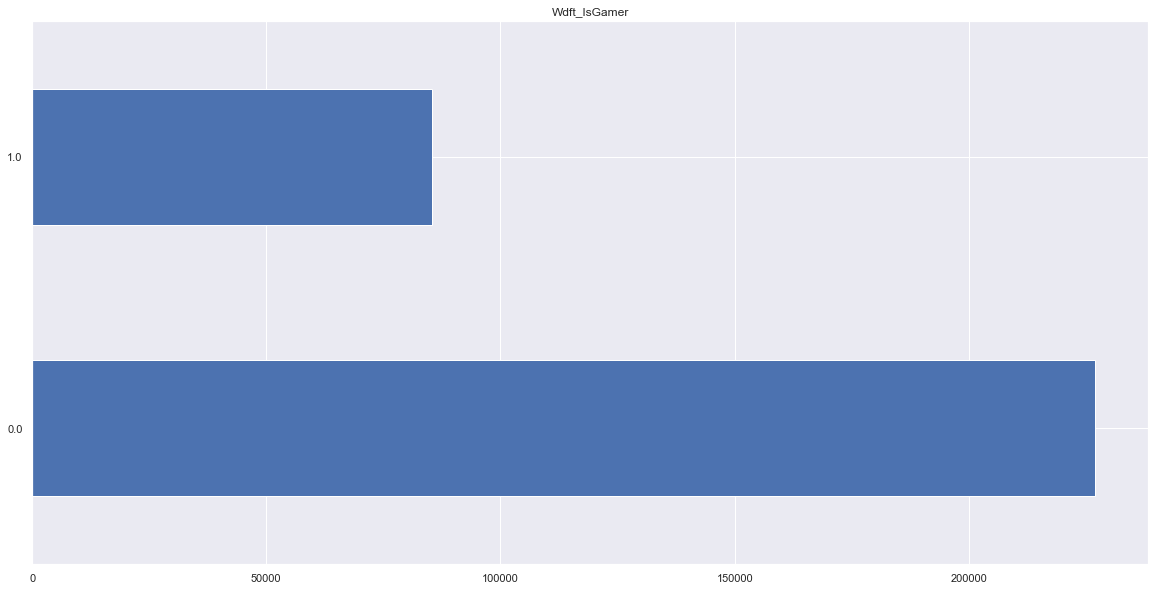

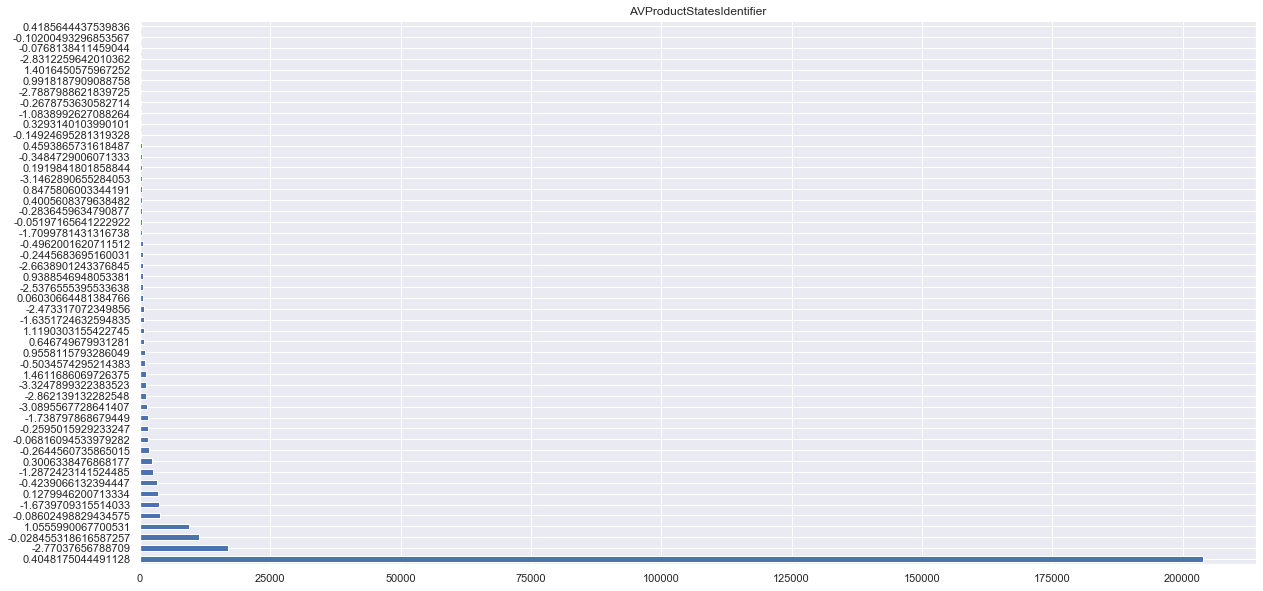

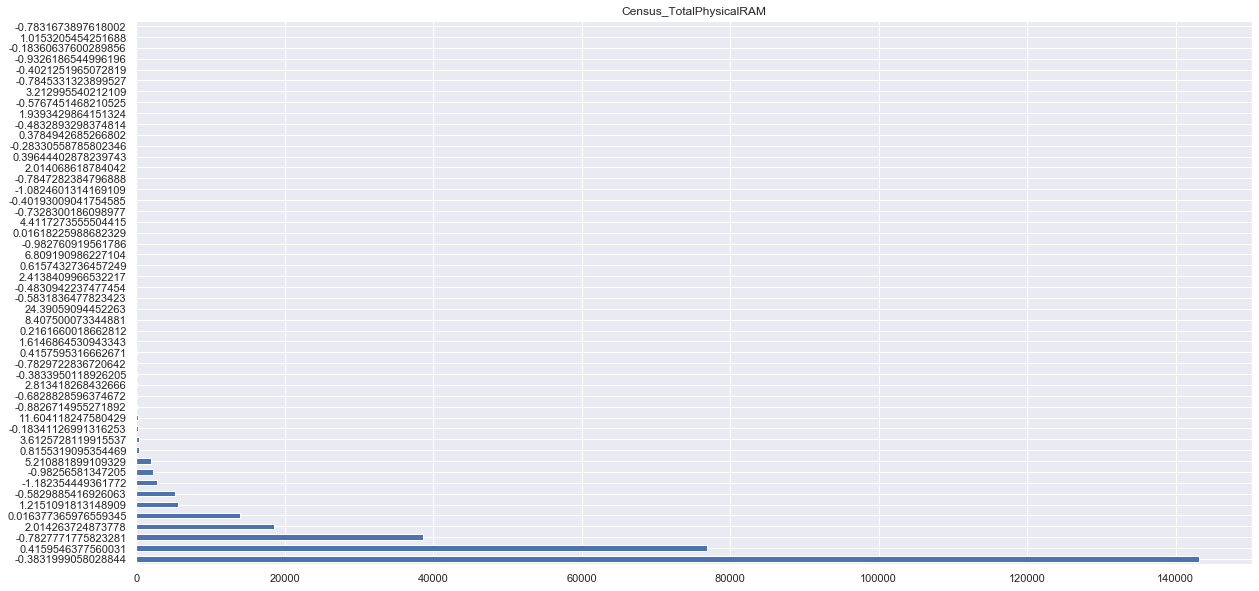

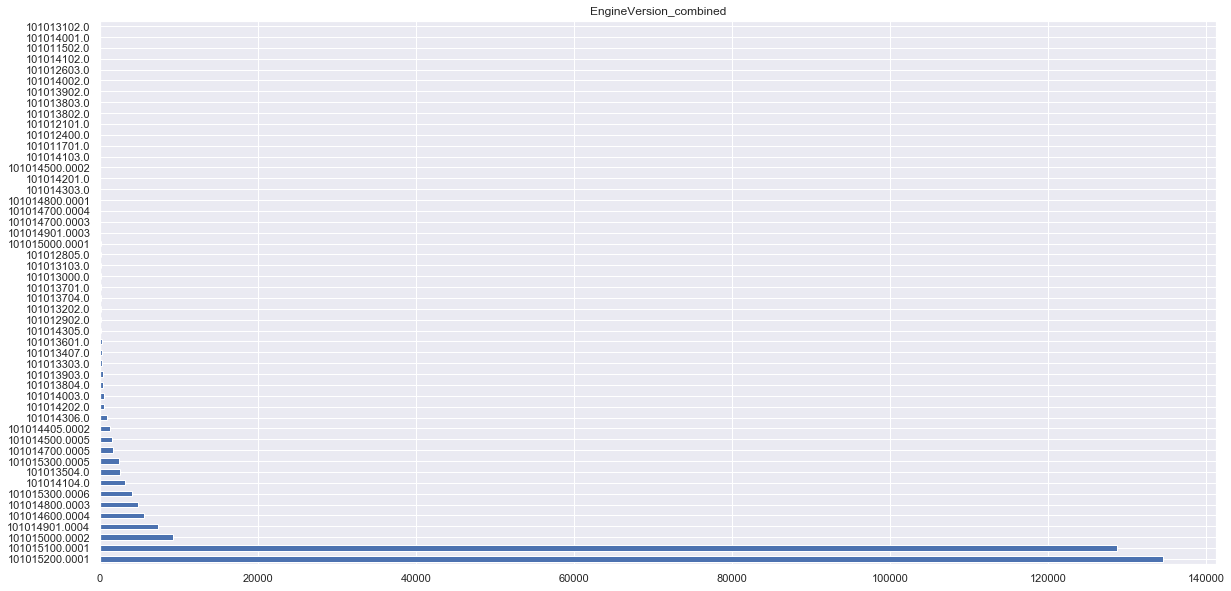

In [29]:
#Display distributions for correlated variables

import matplotlib.pyplot as plt
for i, col in enumerate(correlated_cols):
    #count = train_data[col].value_counts(sort=False).sort_values(ascending=False).nlargest(50)
    plt.figure(i)
    train_data[col].value_counts(sort=False).sort_values(ascending=False).nlargest(50).plot(kind='barh', figsize=(20,10), title=col)


In [30]:
correlated_cols

['AvSigVersion',
 'Processor',
 'SmartScreen',
 'Census_OSArchitecture',
 'OsBuildLab_platform',
 'EngineVersion_build1',
 'EngineVersion_build2',
 'AppVersion_build1',
 'AVProductsInstalled',
 'IsProtected',
 'Census_ProcessorCoreCount',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer',
 'AVProductStatesIdentifier',
 'Census_TotalPhysicalRAM',
 'EngineVersion_combined']

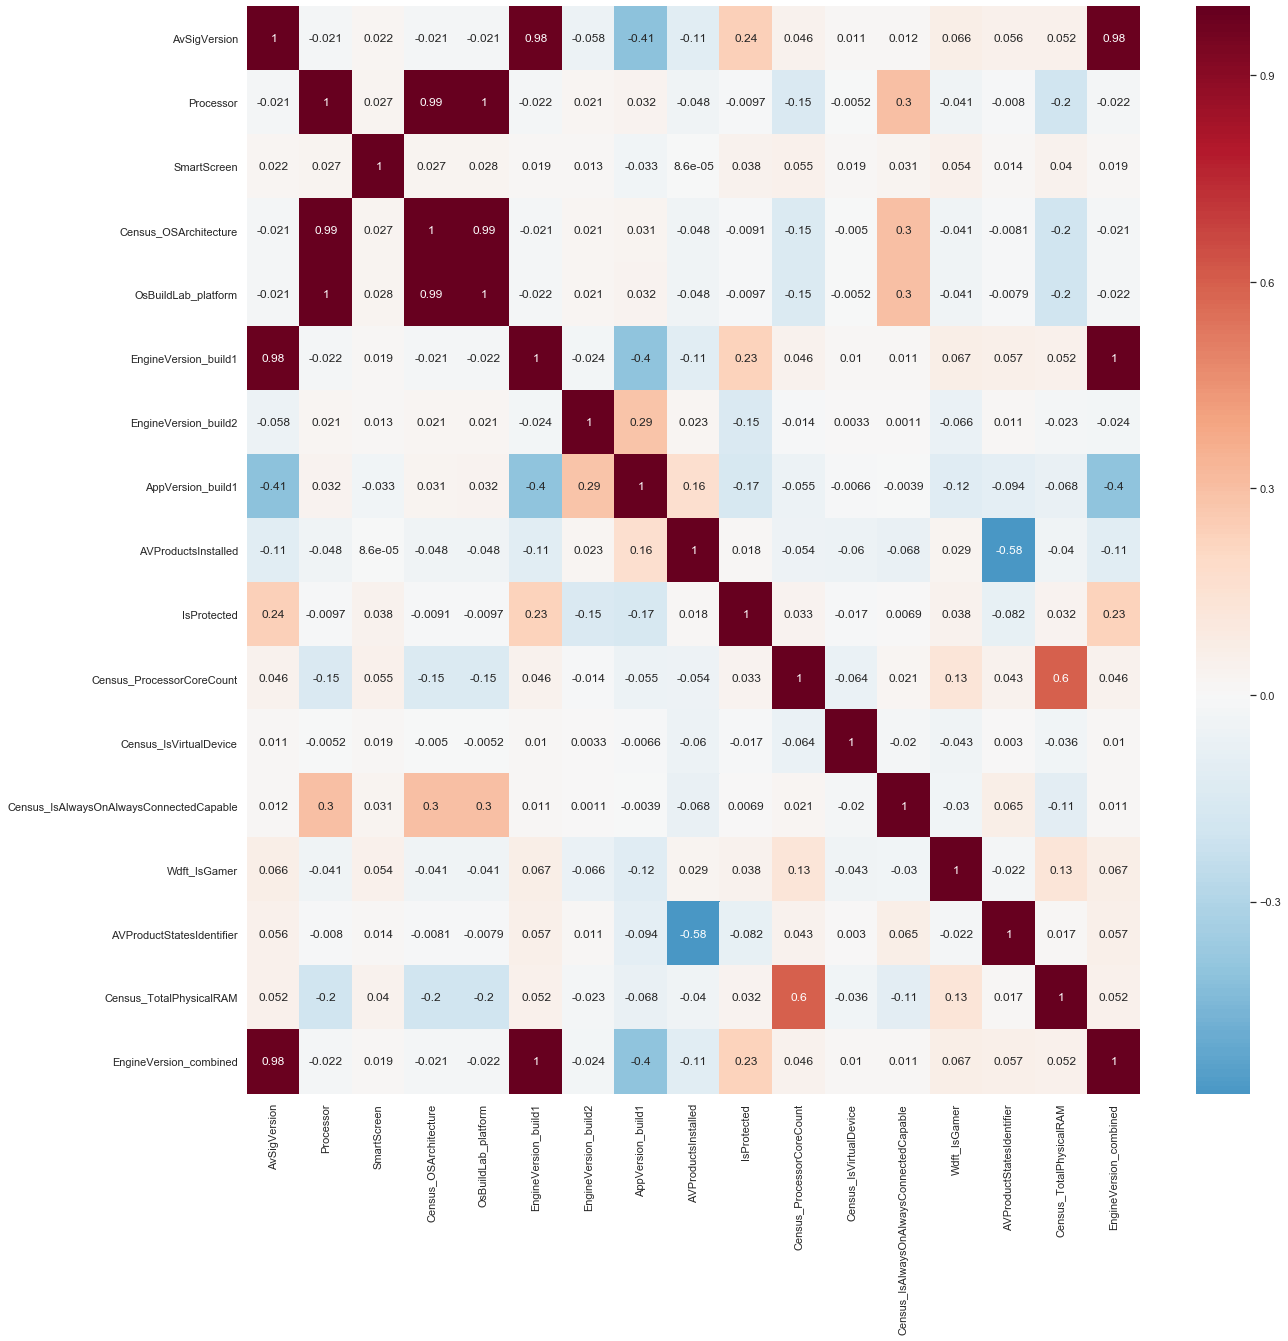

In [31]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(train_data[correlated_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)

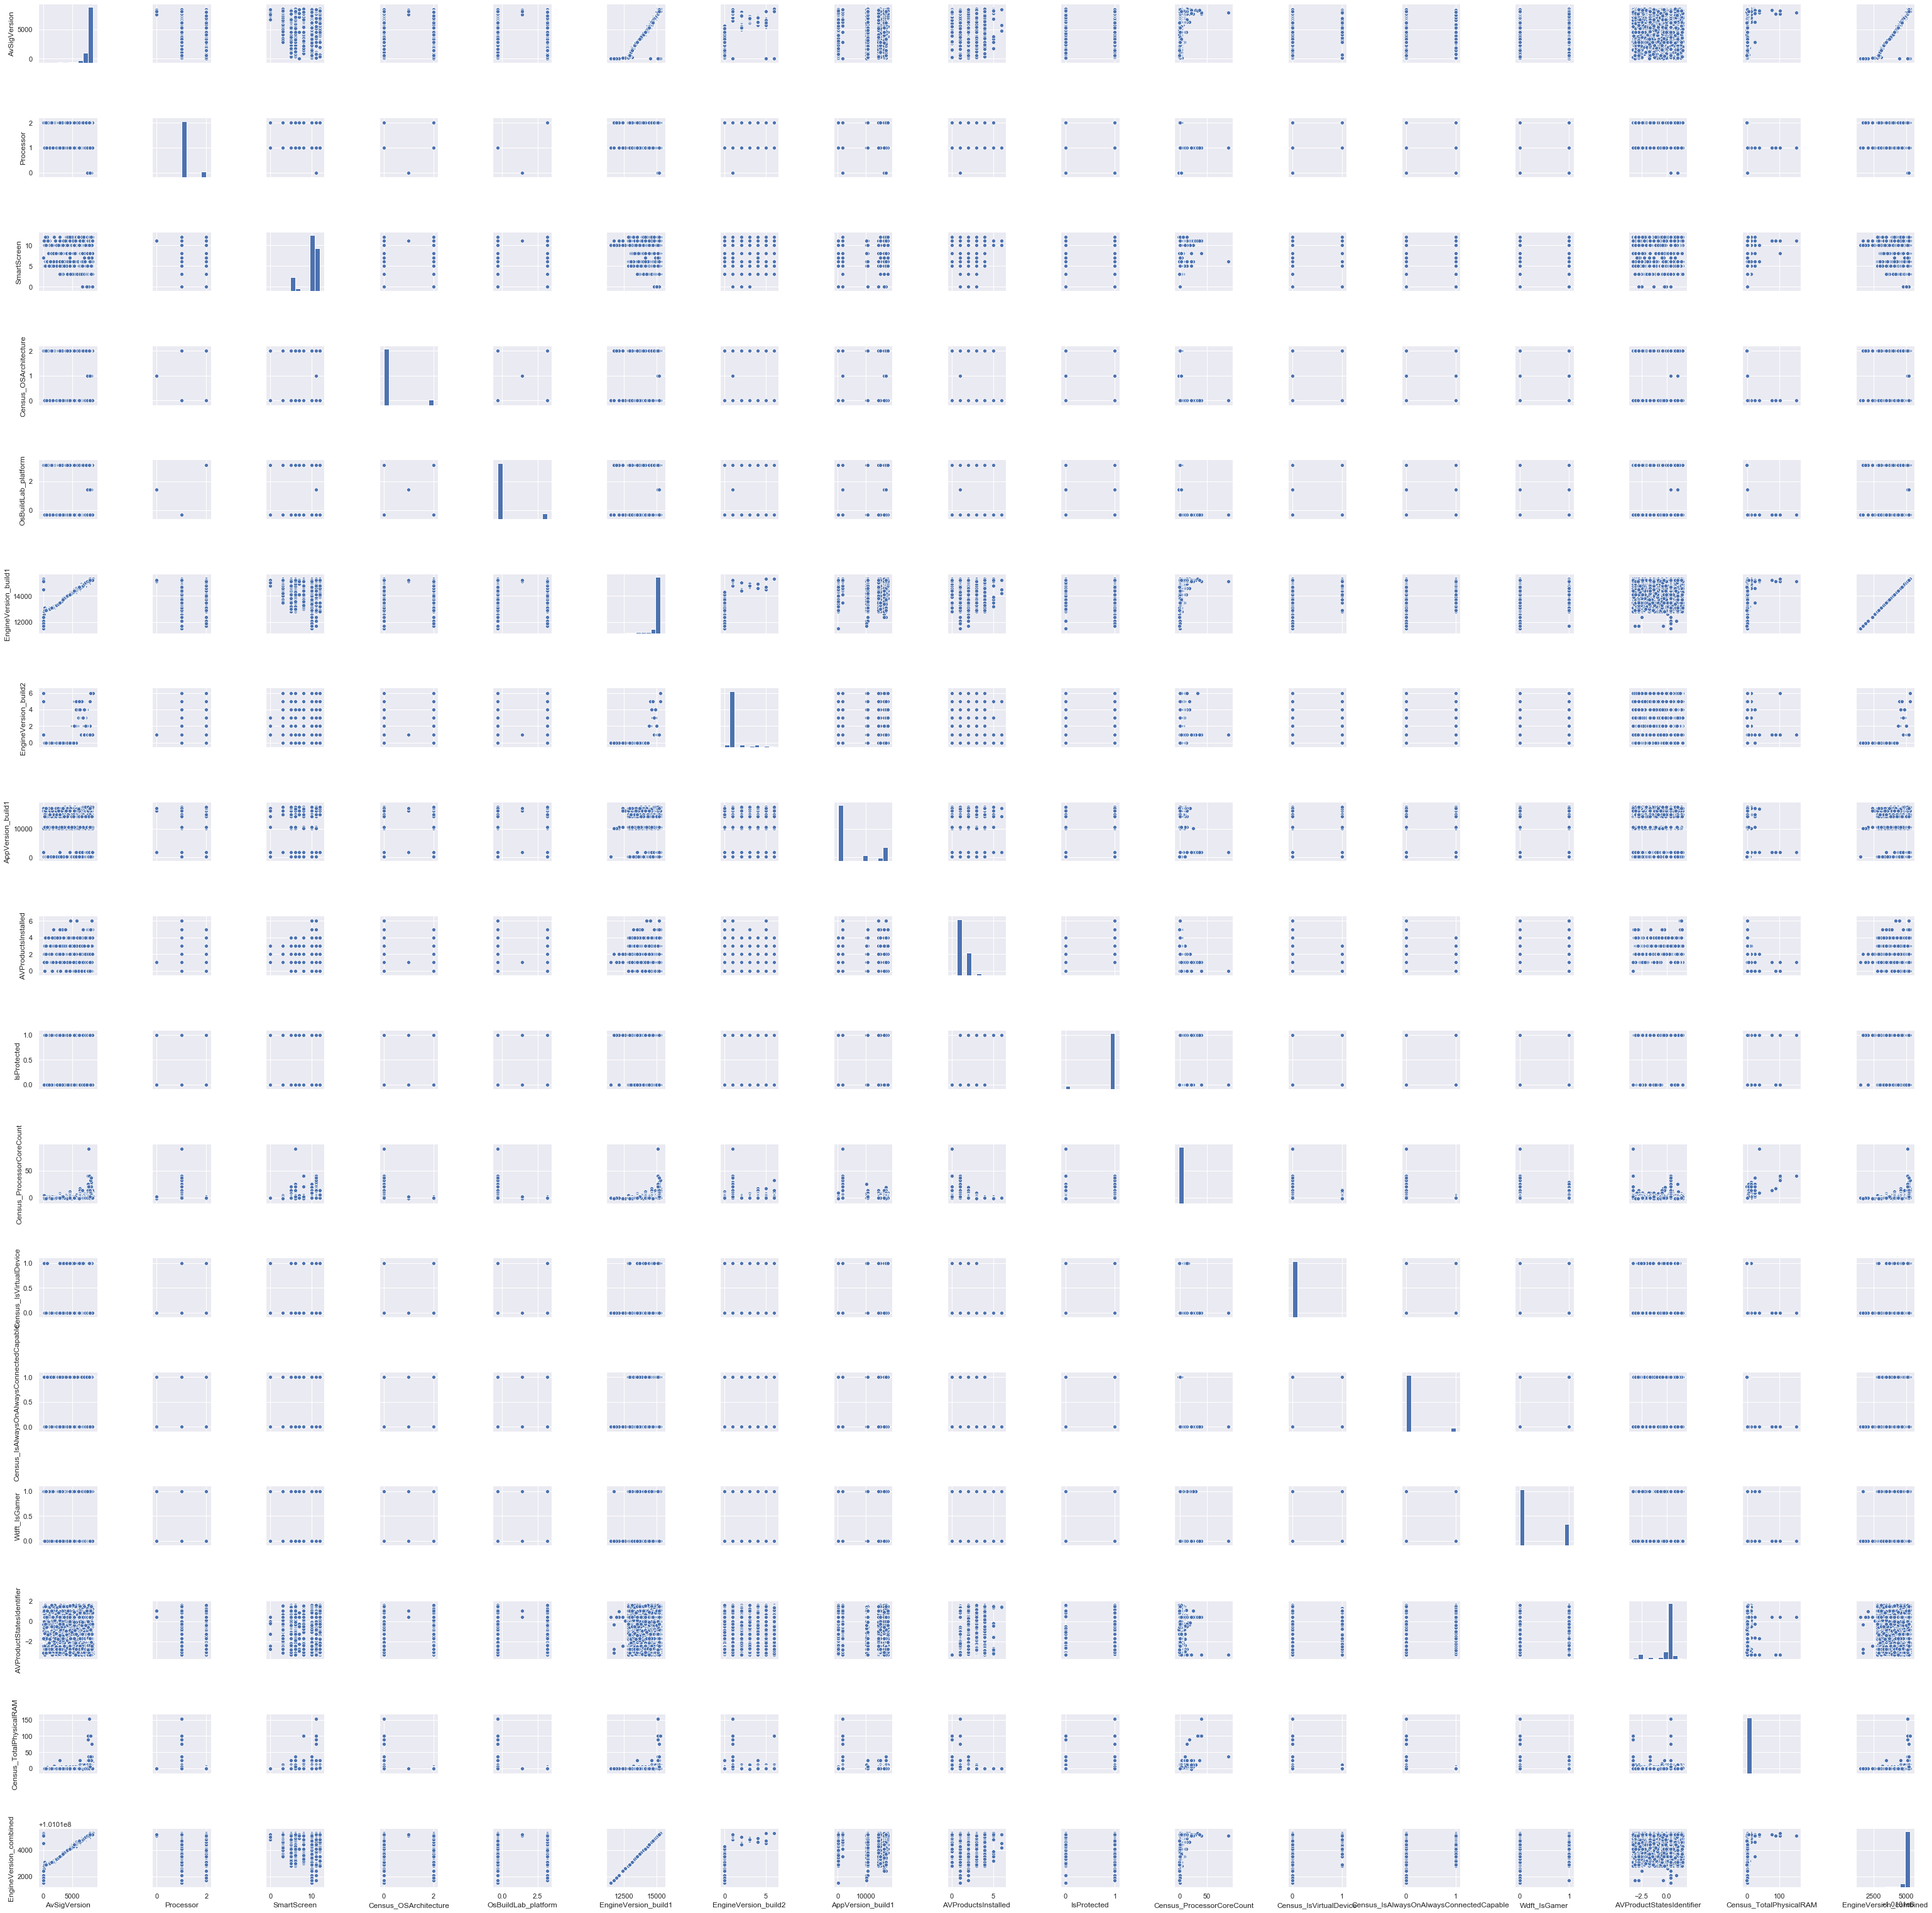

In [32]:
sns.pairplot(train_data[correlated_cols])#, hue=train_labels)

In [32]:
correlated_cols.remove('EngineVersion_build1')
correlated_cols.remove('AvSigVersion')
correlated_cols.remove('Processor')
correlated_cols.remove('Census_OSArchitecture')
correlated_cols.remove('AppVersion_build1')

correlated_cols.append('AppVersion_combined')
correlated_cols.append('AvSigVersion_combined')

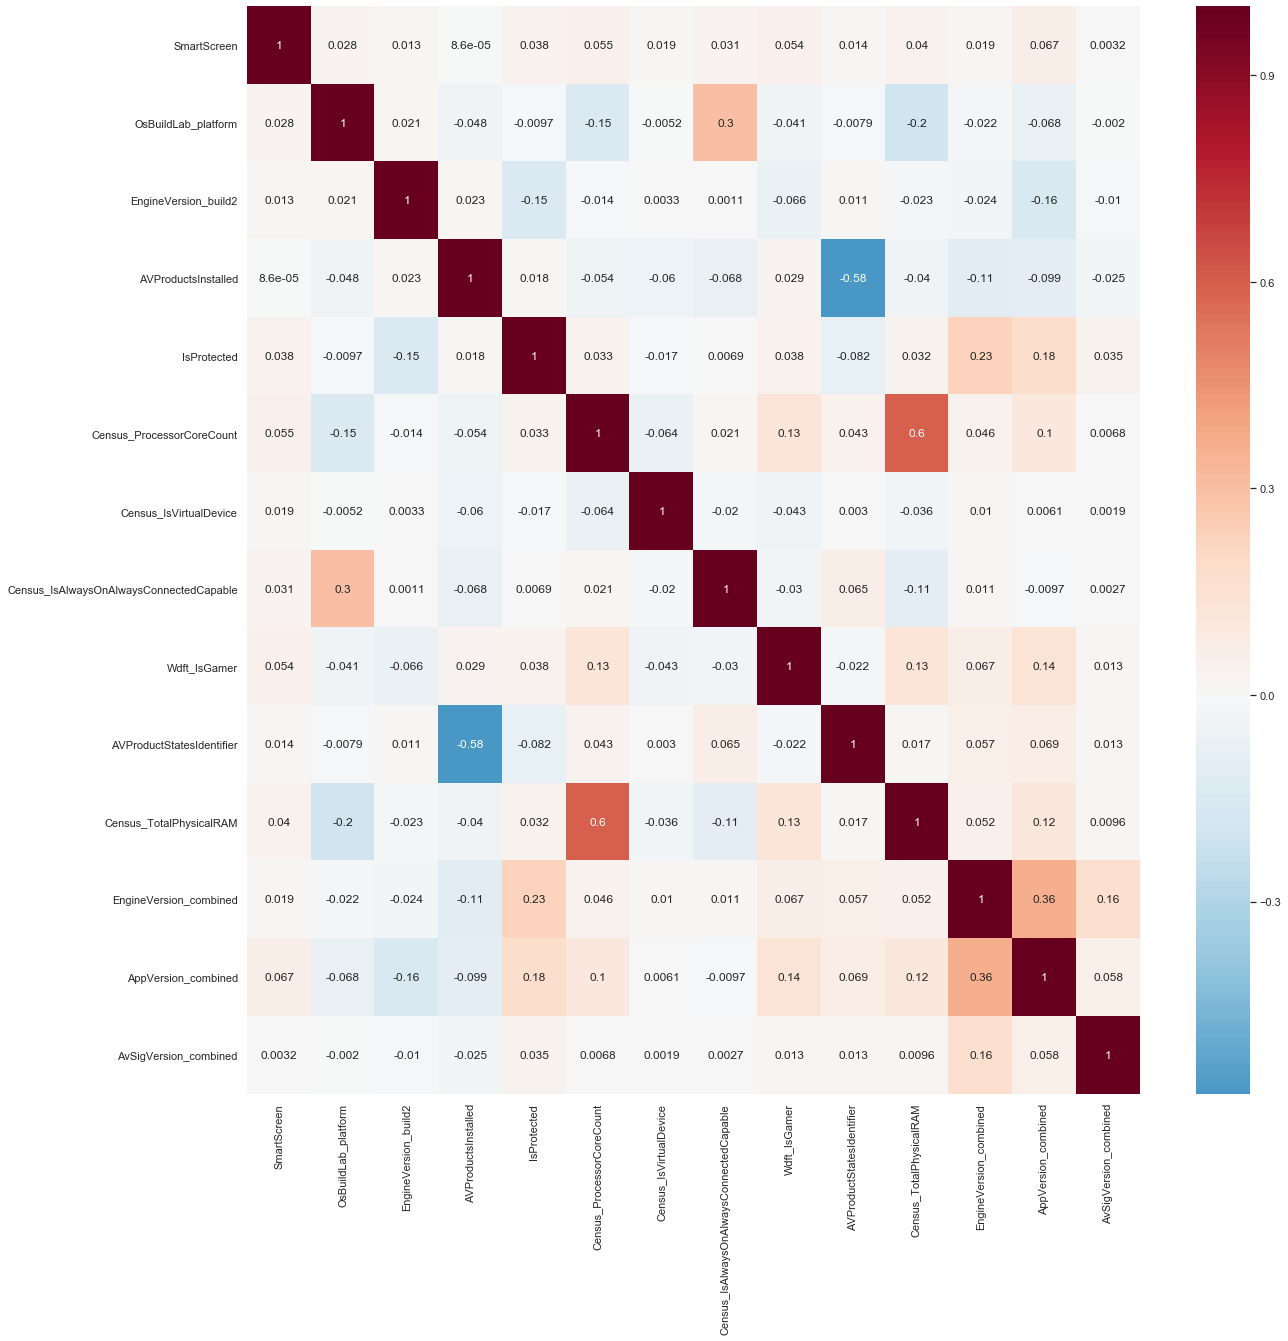

In [33]:
sns.heatmap(train_data[correlated_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)

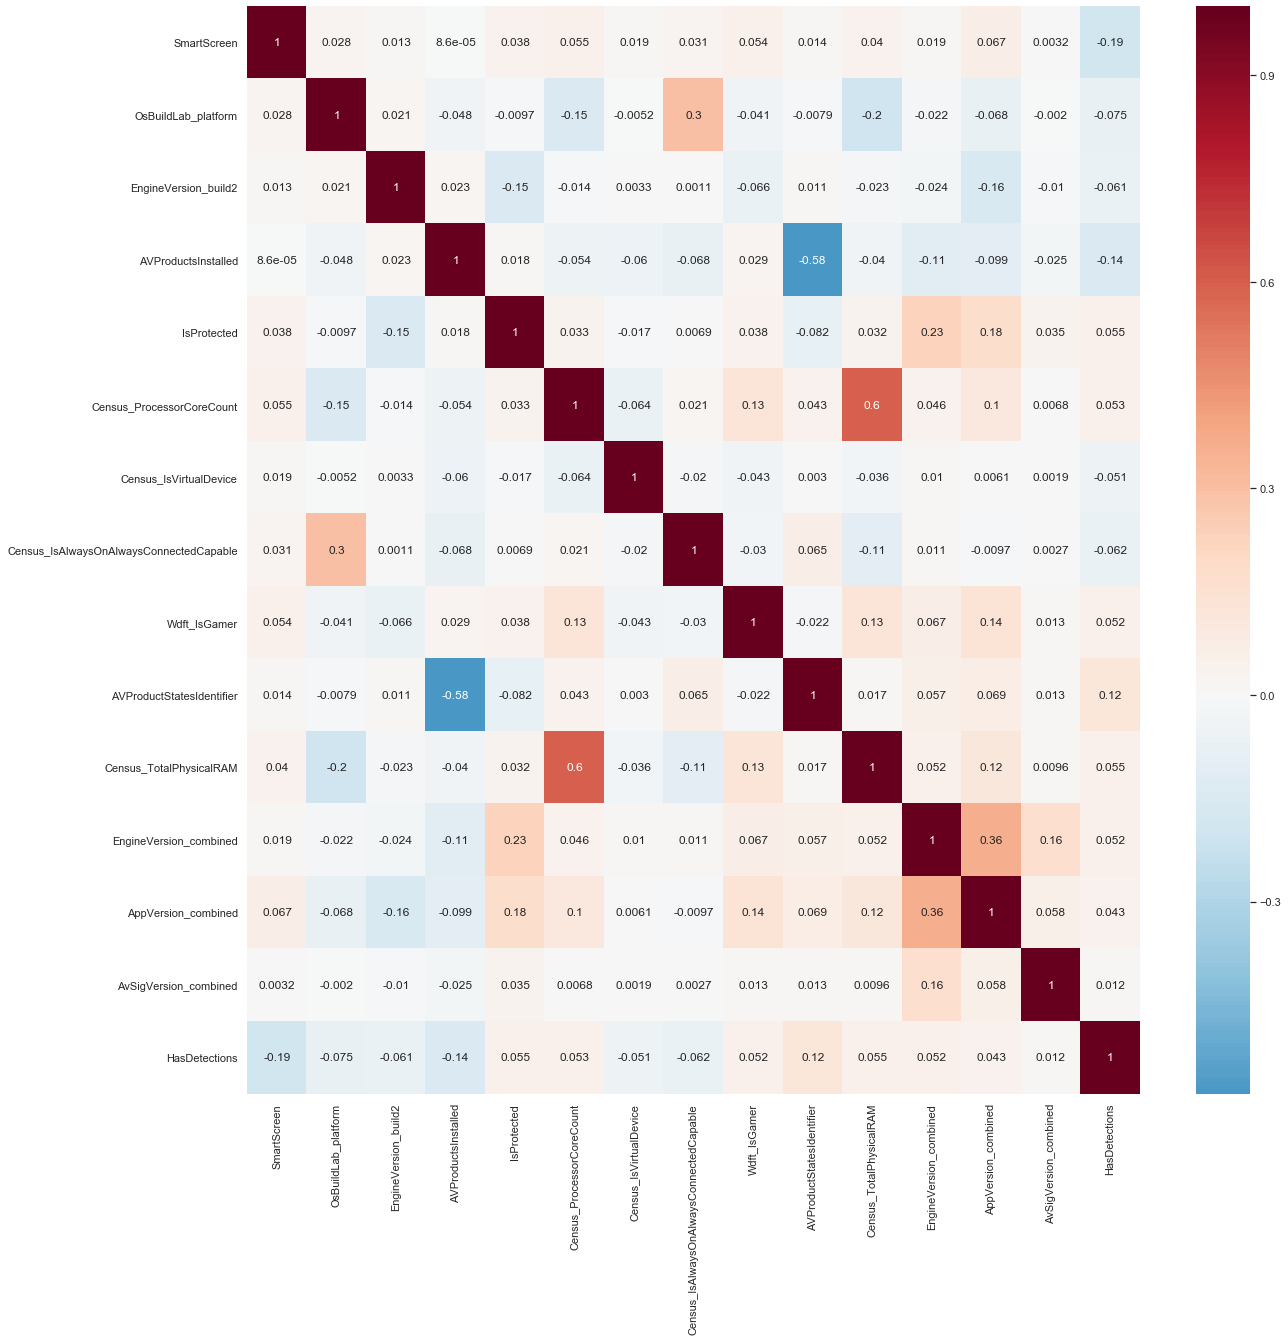

In [34]:
labels = pd.DataFrame()
labels["HasDetections"] = train_labels
df = pd.concat([train_data[correlated_cols], labels], axis=1)
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, center=0.0)

In [36]:
train_data_corr = train_data[correlated_cols]
dev_data_corr = dev_data[correlated_cols]
validate_data_corr = validate_data[correlated_cols]

X_train = train_data_corr
y_train = train_labels
X_test = dev_data_corr
y_test = dev_labels

In [37]:
classifier =  KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[20098 13371]
 [13315 20127]]
0.39882829430138544
0.6011717056986146


In [38]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.6, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

# predict and score on the dev set
pred_y = clf.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[20909 12560]
 [11851 21591]]
0.36482790572551593
0.6351720942744841


In [39]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# predict and score on the dev set
pred_y = clf.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[20824 12645]
 [12125 21317]]
0.3701932417689169
0.6298067582310831


In [42]:
!pip install lightgbm

  Using cached https://files.pythonhosted.org/packages/21/d1/7773d81964183f6892f71cf43b92f90d0bb8c954c05651d5071a2b480420/lightgbm-2.3.1-py2.py3-none-macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl


In [42]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.1,
                max_iter=100,
                max_bins=100,
                max_leaf_nodes=31,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='lightgbm')
lightgbm_est.fit(X_train, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[21358 12111]
 [12298 21144]]
0.36479801527402067
0.6352019847259793


In [61]:
!pip install xgboost

     |████████████████████████████████| 686kB 11.1MB/s eta 0:00:01
  Created wheel for xgboost: filename=xgboost-0.90-cp37-cp37m-macosx_10_9_x86_64.whl size=1696839 sha256=bf6eb80f79d4a2bf38de1c6f961f5e31e99564c2c18bfd85f604557aaf39449e
  Stored in directory: /Users/kevin/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [41]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.1,
                max_iter=100,
                max_bins=100,
                max_leaf_nodes=31,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='xgboost')
lightgbm_est.fit(X_train, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[21484 11985]
 [12500 20942]]
0.365933852430841
0.634066147569159


In [69]:
!pip install catboost

     |████████████████████████████████| 10.4MB 13.3MB/s eta 0:00:01
     |████████████████████████████████| 7.3MB 53.4MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=ac25f7cbc50853e3c53a0e2bf258fdae5ec1b246d1a987867df58aeb3b715e95
  Stored in directory: /Users/kevin/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [43]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.1,
                max_iter=100,
                max_bins=100,
                max_leaf_nodes=31,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='catboost')
lightgbm_est.fit(X_train, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[21352 12117]
 [12592 20850]]
0.36928158299831115
0.6307184170016888


In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# predict and score on the dev set
pred_y = clf.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[19603 13866]
 [13523 19919]]
0.40933478800197276
0.5906652119980272


In [45]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

# predict and score on the dev set
pred_y = clf.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[19932 13537]
 [14435 19007]]
0.4180478546128439
0.5819521453871561


In [46]:
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dtc.fit(X_train, y_train)

# predict and score on the dev set
pred_y = dtc.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[19382 14087]
 [14503 18939]]
0.4272840041248823
0.5727159958751177


In [47]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(max_iter=5000)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[    0 33469]
 [    0 33442]]
0.500201760547593
0.4997982394524069


/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Using SelectFromModel to get features

In [48]:
fsel = ske.ExtraTreesClassifier(n_estimators=100).fit(train_data, train_labels)
model = SelectFromModel(fsel, prefit=True)
X_train_data_new = model.transform(train_data)
X_test_data_new = model.transform(dev_data)

In [49]:
nb_features = X_train_data_new.shape[1]
nb_features

51

In [50]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.1,
                max_iter=100,
                max_bins=100,
                max_leaf_nodes=31,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='lightgbm')
lightgbm_est.fit(X_train_data_new, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[22232 11237]
 [12095 21347]]
0.34870200714381794
0.6512979928561821


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.6, max_depth=3, random_state=0)
clf.fit(X_train_data_new, y_train)

# predict and score on the dev set
pred_y = clf.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[21927 11542]
 [11901 21541]]
0.35036092720180534
0.6496390727981947


In [83]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.2,
                max_iter=100,
                max_bins=500,
                max_depth=-1,
                max_leaf_nodes=100,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='lightgbm')
lightgbm_est.fit(X_train_data_new, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[22167 11302]
 [11903 21539]]
0.3468039634738683
0.6531960365261317


# PCA Stuff

In [610]:
 def run_PCA_GMM_analysis(param_threshold, X_train, X_test, y_train, y_test):
    # set up a series of conditions where the parameter sum of PCA
    # components and GMM components will be <= 50
    # Parameters will be expressed in terms of G = GMM components, 
    # P = PCA components and C = Number of classes 
    C = 2 # number of classes will always be two for this experiment
    # P and G combinations are what will change based on their relationship with
    # the covariance type
    # First line up a cartesian matrix of PCA and GMM components possibilities
    P, G = np.meshgrid(np.arange(1, param_threshold), np.arange(1, param_threshold))
    # Define possible combinations where the sum of parameters will be <= param_threshold
    # depending on the covariance type
    # The parameter count formula calculations were found on
    # https://stats.stackexchange.com/questions/280893/number-of-parameters-in-multivariate-gaussian-for-different-covariance-matrices/280896#280896
    diag_params = 2 * P * G * C <= param_threshold
    full_params = ((P * G) + (P * (P + 1) * G) / 2) * C <= param_threshold
    sphe_params = (P + 1) * G * C <= param_threshold
    tied_params = ((P * G) + (P * (P + 1)) / 2) * C <= param_threshold
    experiments = [sphe_params, diag_params, tied_params, full_params]
    CT = ['spherical', 'diag', 'tied', 'full']
    # store the winning hyperparameters
    winning_accuracy = 0.0
    winning_CT = None
    winning_PCA = None
    winning_GMM = None
    # keep track of all the trials for sorting / displaying
    trials = np.empty((0,4))
    # run through each experiment - spherical, diag, tied and full
    for i, experiment in enumerate(experiments):
    # iterate through the combinatorial product of PCA components and GMM 
    # components that sum up to less than 50 parameter combinations for the
    # experiment
        for p, g in np.column_stack((P[experiment], G[experiment])):
            pca = PCA(p)
            projected = pca.fit_transform(X_train)
            projected_test = pca.transform(X_test)

            gm_mod_pos = GaussianMixture(n_components = g, reg_covar=.0001, covariance_type=CT[i])
            gm_mod_pos.fit(projected[y_train==1])

            gm_mod_neg = GaussianMixture(n_components = g, reg_covar=.0001, covariance_type=CT[i])
            gm_mod_neg.fit(projected[y_train==0])

            prob_pos = gm_mod_pos.score_samples(projected_test)
            prob_neg = gm_mod_neg.score_samples(projected_test)

            winning_predictions = np.where(prob_pos >= prob_neg, 1, 0)
            accuracy = metrics.accuracy_score(y_test, winning_predictions)
            trials = np.append(trials, np.array([[p, g, i, accuracy]]), axis=0)
            if accuracy > winning_accuracy:
                winning_accuracy = accuracy
                winning_CT = CT[i]
                winning_PCA = p
                winning_GMM = g

    # calculate the parameter count for the winning experiment using its 
    # hyperparameters
    if winning_CT=='spherical':
        winning_params = (winning_PCA + 1) * winning_GMM * C 
    elif winning_CT=='diag':
        winning_params = (2 * winning_PCA * winning_GMM * C)
    elif winning_CT=='full':
        winning_params = ((winning_PCA * winning_GMM) + 
                          (winning_PCA * (winning_PCA + 1) * winning_GMM) / 2) * C
    elif winning_CT=='tied':
        winning_params = ((winning_PCA * winning_GMM) + 
                          (winning_PCA * (winning_PCA + 1)) / 2) * C
    print("Best accuracy is {:5.4f} with {} parameters".format(
        winning_accuracy, winning_params))
    print("PCA components = {}, GMM components = {}, covariance_type = {}".format(
        winning_PCA, winning_GMM, winning_CT))
    trials = trials[trials[:,3].argsort()[::-1], :]
    print("\n| Rank | PCA | GMM | Cov. Type | Accuracy |")
    print("+------+-----+-----+-----------+----------+")
    for i, trial in enumerate(trials):
        print("| {:4} | {:3} | {:3} | {} | {:9.4f}|".format(
            i+1, int(trial[0]), int(trial[1]),
            CT[int(trial[2])].rjust(9), trial[3]))

In [654]:
correlated_cols=[]
for i, col in enumerate(numeric_cols):
    corr = train_labels.corr(train_data[col])
    if(corr > 0.05  or corr < -0.05):
        correlated_cols.append(col)

correlated_cols.remove('EngineVersion_build1')
correlated_cols.remove('EngineVersion_combined')
correlated_cols.remove('Processor')
correlated_cols.remove('Census_OSArchitecture')

train_data_corr = train_data[correlated_cols]
dev_data_corr = dev_data[correlated_cols]
test_data_corr = test_data[correlated_cols]

X_train = train_data_corr
y_train = train_labels
X_test = dev_data_corr
y_test = dev_labels

In [655]:
run_PCA_GMM_analysis(29, X_train, X_test, y_train, y_test)

Best accuracy is 0.6001 with 20 parameters
PCA components = 5, GMM components = 1, covariance_type = diag

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |   5 |   1 |      diag |    0.6001|
|    2 |   6 |   1 |      diag |    0.5950|
|    3 |   7 |   1 |      diag |    0.5915|
|    4 |   4 |   1 |      tied |    0.5796|
|    5 |   4 |   1 |      full |    0.5796|
|    6 |   4 |   1 |      diag |    0.5784|
|    7 |   3 |   2 |      tied |    0.5746|
|    8 |   3 |   1 |      tied |    0.5744|
|    9 |   3 |   1 |      full |    0.5744|
|   10 |   3 |   1 |      diag |    0.5743|
|   11 |   3 |   2 |      diag |    0.5735|
|   12 |   3 |   3 | spherical |    0.5388|
|   13 |   2 |   3 |      diag |    0.5386|
|   14 |   2 |   4 |      tied |    0.5356|
|   15 |   1 |  10 |      tied |    0.5347|
|   16 |   1 |   9 |      tied |    0.5344|
|   17 |   2 |   2 |      full |    0.5342|
|   18 |   1 |  12 |      tied |    0.5340|
|   19 |   1 

In [656]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict and score on the dev set
pred_y = dtc.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[19439 14030]
 [14966 18476]]
0.43335176577842205
0.566648234221578


In [606]:

mycols=all_cols.copy()
mycols.remove('EngineVersion_combined')
mycols.remove('AppVersion_combined')
mycols.remove('AvSigVersion_combined')
mycols.remove('Census_OSVersion_combined')
mycols.remove('OsVer_combined')
mycols.remove('OsBuildLab_combined')


In [607]:
#impute for all columns and let PCA find the best dimensions
#imputer = SimpleImputer(strategy = 'median')
#imputer.fit(train_data)
#X_train = imputer.transform(train_data)[train_data['Wdft_IsGamer']==0]
#X_test = imputer.transform(dev_data)[dev_data['Wdft_IsGamer']==0]
X_train = train_data[mycols]#[train_data['Wdft_IsGamer']==0]
y_train = train_labels#[train_data['Wdft_IsGamer']==0]
X_test = dev_data[mycols]#[dev_data['Wdft_IsGamer']==0]
y_test = dev_labels#[dev_data['Wdft_IsGamer']==0]

In [608]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[25400  8069]
 [23365 10077]]
0.469788226151156
0.530211773848844


In [567]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[    0 33469]
 [    0 33442]]
0.500201760547593
0.4997982394524069


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [442]:
X_train.shape

(312251, 148)

In [609]:
run_PCA_GMM_analysis(120, X_train, X_test, y_train, y_test)

Best accuracy is 0.5421 with 110.0 parameters
PCA components = 2, GMM components = 11, covariance_type = full

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |   2 |  11 |      full |    0.5421|
|    2 |   2 |  12 |      full |    0.5413|
|    3 |   1 |  23 |      full |    0.5409|
|    4 |   1 |  30 | spherical |    0.5403|
|    5 |   1 |  29 |      diag |    0.5402|
|    6 |   1 |  55 |      tied |    0.5402|
|    7 |   1 |  25 |      full |    0.5401|
|    8 |   2 |   8 |      full |    0.5400|
|    9 |   1 |  39 |      tied |    0.5399|
|   10 |   1 |  58 |      tied |    0.5398|
|   11 |   1 |  49 |      tied |    0.5398|
|   12 |   1 |  35 |      tied |    0.5397|
|   13 |   1 |  28 | spherical |    0.5397|
|   14 |   1 |  54 |      tied |    0.5396|
|   15 |   1 |  52 |      tied |    0.5394|
|   16 |   1 |  50 |      tied |    0.5393|
|   17 |   2 |  12 |      diag |    0.5392|
|   18 |   1 |  41 |      tied |    0.5391|
|   19 | 

navy
0
turquoise
1


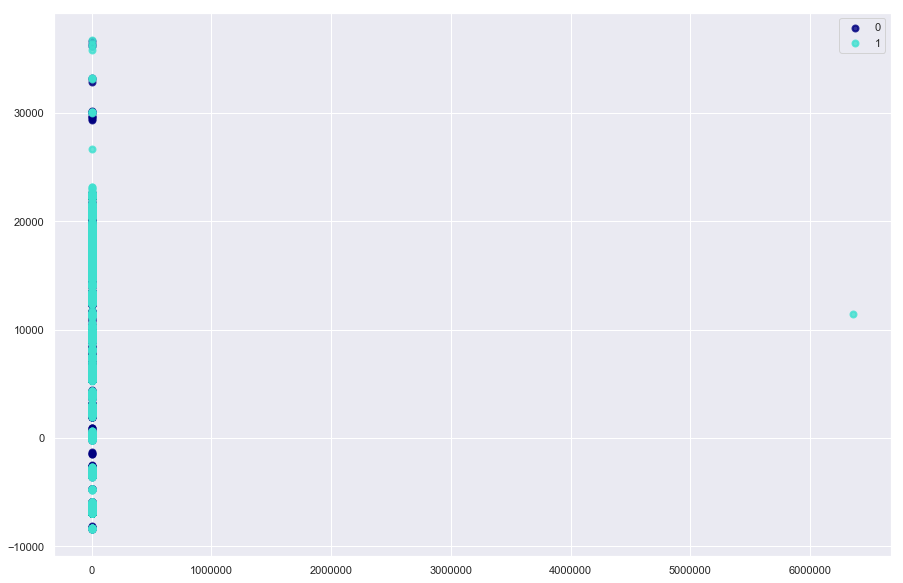

In [611]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_train)

plt.figure(figsize=(15,10))

from collections import defaultdict

category = defaultdict(list)
category[0].append('not-detected')
category[1].append('has-detections')

colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, category.keys()):
    print(color)
    print(cat)
    plt.scatter(projected[y_train==cat, 0], projected[y_train==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

# Feature reduction using ExtraTreesClassifier - experimental code

In [612]:
best_cols =[
    'SmartScreen',
    'AVProductsInstalled',
    'AVProductStatesIdentifier',
    'OsBuildLab_platform',
    'AppVersion_build1',
    'Census_IsAlwaysOnAlwaysConnectedCapable',
    'EngineVersion_build2',
    'Census_TotalPhysicalRAM',
    'EngineVersion_build1',
    'Census_IsVirtualDevice',
    'AvSigVersion_minor',
    'SMode_wasna',
    'SMode',
    'RtpStateBitfield_wasna',
    'Wdft_IsGamer_wasna',
    'Wdft_RegionIdentifier_wasna',
    'Census_ProcessorClass',
    'Census_PrimaryDiskTotalCapacity_wasna'
]

In [453]:
best_cols = [
    'AVProductsInstalled',
    'AVProductStatesIdentifier',
    'OsBuildLab_platform',
    'AppVersion_combined',
    'Census_IsAlwaysOnAlwaysConnectedCapable',
    'EngineVersion_combined',
    'IsProtected',
    'Census_IsVirtualDevice',
    'SMode_wasna',
    'IsSxsPassiveMode',
    'Census_FirmwareVersionIdentifier_wasna',
    'Census_DeviceFamily',
    'HasTpm',
    'Wdft_IsGamer_wasna',
    'OsVer_combined'
]

In [633]:
X_train = train_data#[best_cols]
y_train = train_labels
X_test = dev_data#[best_cols]
y_test = dev_labels

In [634]:
fsel = ske.ExtraTreesClassifier().fit(X_train, y_train)
model = SelectFromModel(fsel, prefit=True)
X_train_data_new = model.transform(X_train)
X_test_data_new = model.transform(X_test)
nb_features = X_train_data_new.shape[1]
nb_features

/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


51

In [635]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train_data_new, y_train)

pred_y = classifier.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[25437  8032]
 [23432 10010]]
0.47023658292358506
0.5297634170764149


In [458]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train_data_new, y_train)

pred_y = classifier.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[    0 33469]
 [    0 33442]]
0.500201760547593
0.4997982394524069


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [636]:
run_PCA_GMM_analysis(60, X_train_data_new, X_test_data_new, y_train, y_test)

Best accuracy is 0.5408 with 58.0 parameters
PCA components = 1, GMM components = 28, covariance_type = tied

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |   1 |  28 |      tied |    0.5408|
|    2 |   2 |   6 |      full |    0.5399|
|    3 |   2 |   3 |      full |    0.5395|
|    4 |   2 |   6 |      diag |    0.5392|
|    5 |   4 |   6 | spherical |    0.5391|
|    6 |   1 |  12 |      diag |    0.5388|
|    7 |   2 |   5 |      full |    0.5384|
|    8 |   1 |  10 | spherical |    0.5383|
|    9 |   1 |   8 | spherical |    0.5382|
|   10 |   1 |  26 |      tied |    0.5381|
|   11 |   1 |  10 |      diag |    0.5381|
|   12 |   1 |  14 | spherical |    0.5380|
|   13 |   1 |  18 |      tied |    0.5380|
|   14 |   1 |  29 |      tied |    0.5379|
|   15 |   1 |  15 | spherical |    0.5378|
|   16 |   1 |   9 |      diag |    0.5377|
|   17 |   1 |  11 | spherical |    0.5376|
|   18 |   1 |   7 | spherical |    0.5376|
|   19 |  

In [637]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_data_new, y_train)

# predict and score on the dev set
pred_y = dtc.predict(X_test_data_new)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[18921 14548]
 [14443 18999]]
0.4332770396496839
0.5667229603503161


In [638]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict and score on the dev set
pred_y = dtc.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[19344 14125]
 [14494 18948]]
0.42771741567156374
0.5722825843284363


# Feature reduction using Ridge Reduction (and trying Emsemble Boosting on the features)

In [90]:
X_train = train_data
y_train = train_labels
X_test = dev_data
y_test = dev_labels

In [91]:
# Feature reduction using Ridge regression

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', solver='liblinear',
                                multi_class='ovr', C=0.18, max_iter=1000)
rfe = RFE(model, 15)
model = rfe.fit(X_train, y_train)

print("Num Features: %s" % (model.n_features_))
print("Selected Features: %s" % (model.support_))
print("Feature Ranking: %s" % (model.ranking_))

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_, names=all_cols))


#X_train_data_new = model.transform(X_train)
#X_test_data_new = model.transform(X_test)

Num Features: 15
Selected Features: [False False False  True False False False False False False False False
  True False False False False  True  True False  True  True False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False  True False False False
 False False False False False False False False  True  True False False
 False False  True False False False False False False False False False
 False False False False False]
Feature Ranking: [ 74  21   6   1  28  63  34  25  22  1

/Users/kevin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.93894e-25): result may not be accurate.
  overwrite_a=True).T


In [93]:
new_cols = []
#print(np.array(model.ranking_))
for c in (model.ranking_):
    if (model.support_[c]):
        print(all_cols[c])
        new_cols.append(all_cols[c])

Census_OSArchitecture
Census_OSVersion
Census_PowerPlatformRoleName
OsSuite
AVProductsInstalled
DefaultBrowsersIdentifier
OsBuildLab_platform
Census_ProcessorCoreCount
Census_OSSkuName
AvSigVersion
Census_TotalPhysicalRAM
Census_ChassisTypeName
AVProductStatesIdentifier
Census_OSEdition
SmartScreen


In [94]:
X_train = train_data[new_cols]
y_train = train_labels
X_test = dev_data[new_cols]
y_test = dev_labels

In [95]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble._hist_gradient_boosting.utils import (get_equivalent_estimator)

est = HistGradientBoostingClassifier(learning_rate=.1,
                max_iter=100,
                max_bins=100,
                max_leaf_nodes=31,
                n_iter_no_change=None,
                random_state=0,
                verbose=0)

est.set_params(loss='binary_crossentropy')

lightgbm_est = get_equivalent_estimator(est, lib='lightgbm')
lightgbm_est.fit(X_train, y_train)

# predict and score on the dev set
pred_y = lightgbm_est.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[21218 12251]
 [12455 20987]]
0.36923674732106826
0.6307632526789317


In [96]:
model = LogisticRegression(penalty='l2', solver='liblinear', multi_class='ovr', C=0.18, max_iter=1000)
model.fit(X_train, y_train)

# predict and score on the dev set
pred_y = model.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[20240 13229]
 [13511 19931]]
0.39963533649175775
0.6003646635082422


# Misc

In [630]:
classifier =  KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[25655  7814]
 [22373 11069]]
0.4511515296438553
0.5488484703561447


In [479]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

pred_y = classifier.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[  145 33324]
 [   67 33375]]
0.49903603293927756
0.5009639670607224


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [631]:
run_PCA_GMM_analysis(33, X_train, X_test, y_train, y_test)

Best accuracy is 0.5734 with 32 parameters
PCA components = 8, GMM components = 1, covariance_type = diag

| Rank | PCA | GMM | Cov. Type | Accuracy |
+------+-----+-----+-----------+----------+
|    1 |   8 |   1 |      diag |    0.5734|
|    2 |   7 |   1 |      diag |    0.5733|
|    3 |   1 |   8 | spherical |    0.5475|
|    4 |   1 |   5 |      full |    0.5440|
|    5 |   1 |   4 |      full |    0.5436|
|    6 |   1 |   6 |      full |    0.5432|
|    7 |   1 |   7 |      diag |    0.5424|
|    8 |   1 |  11 |      tied |    0.5414|
|    9 |   1 |   5 | spherical |    0.5406|
|   10 |   1 |   5 |      diag |    0.5405|
|   11 |   1 |  13 |      tied |    0.5401|
|   12 |   1 |   2 |      full |    0.5393|
|   13 |   1 |   2 | spherical |    0.5393|
|   14 |   1 |   2 |      diag |    0.5393|
|   15 |   1 |   5 |      tied |    0.5392|
|   16 |   1 |   3 |      tied |    0.5391|
|   17 |   1 |  12 |      tied |    0.5377|
|   18 |   2 |   2 |      full |    0.5370|
|   19 |   1 

navy
0
turquoise
1


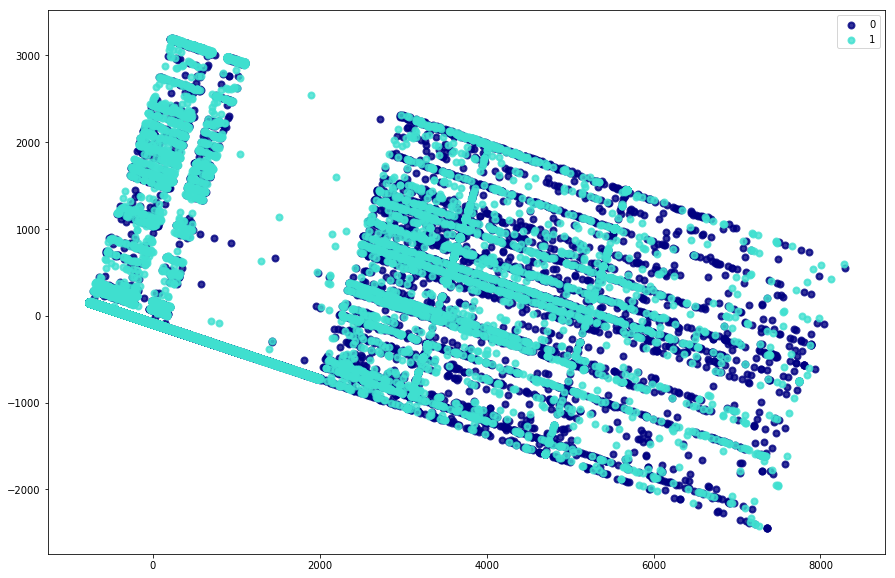

In [481]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality so we can visualize the dataset on a 2d plot
pca = PCA(n_components=2)
train_x_pca_cont = pca.fit_transform(X_train)

plt.figure(figsize=(15,10))

from collections import defaultdict

category = defaultdict(list)
category[0].append('not-detected')
category[1].append('has-detections')

colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple']

for color, cat in zip(colors, category.keys()):
    print(color)
    print(cat)
    plt.scatter(train_x_pca_cont[y_train==cat, 0], train_x_pca_cont[y_train==cat, 1],
                color=color, alpha=.8, lw=2, label=cat)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

In [482]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# predict and score on the dev set
pred_y = dtc.predict(X_test)

results = confusion_matrix(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
accuracy = metrics.accuracy_score(y_test, pred_y)

print(results)
print(error)
print(accuracy)

[[18329 15140]
 [15483 17959]]
0.4576676480698241
0.5423323519301759
